In [35]:
import warnings
warnings.filterwarnings('ignore')
from math import factorial
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3d
import time
import pandas as pd
from tqdm import tqdm
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
import random as random
import math
from tqdm import tqdm

In [36]:
def deleteOneRepositoryMember(rep , gamma):
    gridindices = [item.gridIndex for item in rep]
    OCells = np.unique(gridindices) # ocupied cells
    N = np.zeros(len(OCells))
    for k in range(len(OCells)):
        N[k] = gridindices.count(OCells[k])
    # selection probablity
    p = [math.exp(gamma*item) for item in N]
    p = np.array(p)/sum(p)

    # select cell index
    sci = roulettewheelSelection(p)
    SelectedCell = OCells[sci]

    #selected Cell members
    selectedCellmembers = [item for item in gridindices if item == SelectedCell]

    selectedmemberindex = np.random.randint(0,len(selectedCellmembers))
    #selectedmember = selectedCellmembers[selectedmemberindex]

    # delete memeber
    #rep[selectedmemberindex] = []
    rep = np.delete(rep, selectedmemberindex)

    return rep.tolist()

In [37]:
def SelectLeader(rep , beta):
    gridindices = [item.gridIndex for item in rep]
    OCells = np.unique(gridindices) # ocupied cells
    N = np.zeros(len(OCells))
    for k in range(len(OCells)):
        N[k] = gridindices.count(OCells[k])
    # selection probablity
    p = [math.exp(-beta*item) for item in N]
    p = np.array(p)/sum(p)

    # select cell index
    sci = roulettewheelSelection(p)
    SelectedCell = OCells[sci]

    #selected Cell members
    selectedCellmembers = [item for item in gridindices if item == SelectedCell]

    selectedmemberindex = np.random.randint(0,len(selectedCellmembers))
    # selectedmember = selectedCellmembers[selectedmemberindex]

    return rep[selectedmemberindex]


In [38]:
def roulettewheelSelection(p):
    r = random.random()
    cumsum = np.cumsum(p)
    y = (cumsum<r)
    x= [i for i in y if i==True]
    return len(x)

In [39]:
def FindGridIndex(particle, grid):
    nObj = len(particle.cost)
    NGrid = len(grid[0].LowerBounds)
    
    particle.gridSubIndex = np.zeros((1,nObj))[0]
    for j in range(nObj):  
        index_in_Dim = len( [item for item in grid[j].UpperBounds if particle.cost[j]>item]) 
        particle.gridSubIndex[j] = index_in_Dim

    particle.gridIndex = particle.gridSubIndex[0]

    for j in range(1,nObj):
        particle.gridIndex = particle.gridIndex 
        particle.gridIndex = NGrid*particle.gridIndex
        particle.gridIndex = particle.gridIndex + particle.gridSubIndex[j]

    return particle

In [40]:
def CreateGrid(pop,nGrid,alpha,nobj):
    costs = [item.cost for item in pop]
    Cmin = np.min(costs,axis=0)
    Cmax = np.max(costs,axis=0)
    deltaC = Cmax - Cmin
    Cmin =  Cmin - alpha*deltaC
    Cmax = Cmax + alpha*deltaC
   
    grid = [GridDim() for p in range(nobj)]
    for i in range(nobj):
       dimValues = np.linspace(Cmin[i],Cmax[i],nGrid+1).tolist()
       grid[i].LowerBounds = [-float('inf')] + dimValues
       grid[i].UpperBounds = dimValues  + [float('inf')]
    return grid

In [41]:
def Dominates(x,y):
    x=np.array(x)
    y=np.array(y)
    x_dominate_y = all(x<=y) and any(x<y)
    return x_dominate_y

def DetermineDomination(pop):
    pop_len= len(pop)
    for i in range(pop_len):
         pop[i].IsDominated = False 

    for i in range(pop_len-1):
        for j in range(i+1,pop_len):
            if Dominates(pop[i].cost,pop[j].cost):
                pop[j].IsDominated = True
            if Dominates(pop[j].cost,pop[i].cost):
                pop[i].IsDominated = True

    return pop

In [42]:
def dupfix(VA):
    VA = [int(x) for x in VA]
    for i in range(len(VA)):
      if VA[i] < 0:
        VA[i] = 0
      elif VA[i] > 20:
        VA[i] = 20
      
      
    k = []
    for i in range(len(VA)):
        VA[i] = int(round(VA[i]))
        if VA[i] not in k:
            k.append(VA[i])
        else:
            f = 0
            for q in range(VA[i], 20):
                if q not in k:
                    VA[i] = q
                    k.append(q)
                    f = 1
                    break
            if f == 0:
                for q in reversed(range(0, VA[i])):
                    if q not in k:
                        VA[i] = q
                        k.append(q)
                        f = 1
                        break
    return VA

In [43]:
import time
import platypus as plat
import pygmo as pg
from pygmo import hypervolume
from platypus import Hypervolume, calculate, display
import psutil, tracemalloc

In [44]:
import pandas as pd
import numpy as np
def uniform(low, up, size=None):
  return random.sample(range(varMin,varMax),nVar)
import autograd.numpy as anp 
def MOCPParticle(nVar): #passing VARS=init pop and NDIM=number of decision variables into the funct.
        #print(type(VARS))
        #if isinstance(nVar,np.ndarray):
           # nVar = nVar.tolist()
        #if type(nVar) is numpy.ndarray:
        if not isinstance(nVar, list):
            nVar = nVar.tolist()
            nVar = [int(x) for x in nVar]
       
       
        #nVar = list(nVar)
        #if isinstance(nVar,np.ndarray):
         #   nVar = type(nVar)
          #  return 0
                
        #print("Details of X below")

        #VARS.apply(pd.to_numeric)
        #VARS.astype('int32').dtypes
        #df = VARS.convert_objects(convert_numeric=True)
        dataset = pd.read_csv('DistanceMatrixnan2.csv',index_col=0)
        global x
        #x = pd.DataFrame(nVar)
        
        li = []
        cont_distance =[]
        cont_distanc =[]
        ctyu = []
        sam = 0
        a = 0
        sm = []
        city = dataset.columns.to_list()
        #print("city is \n", city)
        v = len(dataset)
        #print("length of dataset is ", v)
        minL = []
        sumL = []
        maxC2C = []
        avgC2C = []
        C2C = []
        end_values = []
        
        r = nVar
        print (r)
        for i in range(len(r)):
            ctyu.append(city[r[i]])
          #print('city being appended is ',city[r[i]])

        
          #print('selected', city[r[i]]  )
        a = i
        dty = dataset[ctyu].iloc[0]

          #print('tobi is ',dty)
        cont_distance = max(dty)
          
        ydt = dataset[ctyu]
        lo = ydt.iloc[0]
        #print(lo)
        for i in range(len(lo)):
            si = 0
            a = i
              
            for j in range(i +1,len(lo), 1):
                si = lo[i] + lo[j]
                sm.append(si)
            t = 0
            for u in sm:
              t = t + u
            #print(t)
            C2 = (t)/(math.comb(len(r), 2))
            print(C2)
        new_dataset = ydt.dropna() 
        
        row_list = []
        new_list =[]
        ij = []
        values = pd.DataFrame()
        for index, row in ydt.iterrows():
            #print('index is length ',len(row))
            for k in range(len(row)):
              
              if isinstance(row.loc[ctyu[k]], pd.core.series.Series):
                
                row_list.append(row.loc[ctyu[k]].iloc[0])
              else:
                row_list.append(row.loc[ctyu[k]])
            #print("row_list\n", row_list)
            for i in row_list:
              if i != min(row_list):
                    #print("I is not equal to min of rowlist")
                    new_list.append(0)
              else:
                    new_list.append(1)
            #print("New list is \n",new_list)
            to_load = pd.Series(new_list, index=ctyu)
            #print("loaded list is \n", to_load)
            values = values.append(to_load, ignore_index=True)
            #print("values \n", values)
            row_list =[]
            new_list =[]

            result = values.apply(pd.value_counts).drop([0])
            #print("result\n", result,"\nMAX", result.max(axis = 1), "\nMIN", result.min(axis = 1))
            end_val = (result.max(axis = 1) - result.min(axis = 1))/result.max(axis = 1)
            
            #print("end_val\n",end_val)
            end_values.append(end_val)

            
            
            
            C2C.append(C2)
            maxC2C.append(cont_distance)
            avgC2C.append(C2)

            for i in r:
              li.append(city[i])
            #print("A new row ") 
            #print(li)
            new_dataset2 = dataset[li]  
            new_dataset2 = new_dataset2.dropna() 
            new_dataset2 = new_dataset2.reset_index(drop=True)
            new_dataset2 =  pd.DataFrame(new_dataset2)
            mins =  new_dataset2.min(axis=1)
            sum1 = 1/(abs(len(new_dataset2))) * np.sum(mins)
            #print(new_dataset2)
            minL.append(mins)
            sumL.append(sum1)
        minDataset = pd.DataFrame(minL)
        maxC2CDataset = pd.DataFrame(maxC2C)
        C2CDataset = pd.DataFrame(C2C)
        EndValDataset = pd.DataFrame(end_values)
        avgC2CDataset = pd.DataFrame(avgC2C)
        
        #norm_EndValDataset = EndValDataset / (EndValDataset.max())
        #print('EndValDataset.max() is \n', EndValDataset.max())
        #print('EndValDataset is \n',norm_EndValDataset)
        #return norm_EndValDataset
        #endvalues_norm = norm_EndValDataset[1.0].to_list()
        
        maxNu = minDataset.max(axis=1) #generates the maximum of minimum
        maxIjogbon = maxNu.values.tolist()
        end_valmod = end_val.values.tolist()
        #print("Maximum of Minimum is ")
        #print(maxNu)
        #print("\n\n")
        #print("Sum")
        maxNuDataset = pd.DataFrame(maxNu)
        sumDataset = pd.DataFrame(sumL) #generates the sum
        
        #print("maxIjogbon", maxIjogbon[0])
        #print("cont_distance",  cont_distance)
        #print("C2", C2 )
        #print("end_valmod", end_valmod[0])
        #print("sum", sum1)
        
        #return numpy.array([maxIjogbon[0], cont_distance, C2, sum1])
        return numpy.array([maxIjogbon[0], cont_distance, C2, end_valmod[0],  sum1])

In [45]:
#CUSTOM INITIAL PARAMETER 
nVar = 5 # number of decision vars
varMin = 0
varMax = 20
maxIt = 21
nPop = 455
nRep = 100  # size of repository
w = 0.5 # inertia wieght
c1 = 5 # personal learning coefficient
c2 = 5 # global learning coefficient
wdamping = 0.99

In [46]:
D_lower = varMin
D_upper = varMax
NDIM = nVar
def uniform(low, up, size=None):
    return random.sample(range(D_lower,D_upper), NDIM)
uniform(D_lower,D_upper, NDIM)

[8, 10, 19, 13, 16]

In [47]:
import numpy as np
import numpy
beta = 1 # leader selection pressure
gamma = 1 # deletion selection pressure
NoGrid = 5
alpha=0.1 # nerkhe tavarrom grid

# initialization
class Particle:
    position = []
    cost = []
    velocity = []
    best_position = []
    best_cost = []
    IsDominated = []
    gridIndex = []
    gridSubIndex = []


# for each objective a grid items is division of values of objective cost
class GridDim: 
    LowerBounds = []
    UpperBounds = []

global Particles
hyper2 = []
Particles = [Particle() for p in range(nPop)]
Temp_Particles = []

a=1
for i in tqdm(range(nPop)):
    Temp_Position = np.array(uniform(varMin,varMax,nVar))
    Particles[i].position = Temp_Position
    Temp_Particles.append(Temp_Position)
    #print('position is', Particles[i].position)
    Particles[i].velocity = np.zeros(nVar)
    #print("\n Cycle {} \n".format(a))
    Particles[i].cost = np.array(MOCPParticle(Particles[i].position))
    # update best personal Best
    Particles[i].best_position = Particles[i].position
    Particles[i].best_cost = Particles[i].cost
    Particles[i].IsDominated = False 
    a+=1
    #fit = [item.cost for item in Particles]
    #ftDf = pd.DataFrame(fit)
    #hyp = pg.hypervolume(ftDf[[0, 1, 2, 3, 4]].values)
    #hypvol = hyp.compute([20, 20, 20, 20, 20]) / np.prod([20, 20, 20, 20, 20])
    #hyper.append(hypvol)
#print (Particles)
#Particles.cost = MOCP(Temp_Particles, NDIM)   
    
Particles = DetermineDomination(Particles)

Repos = [item for item in Particles if item.IsDominated == False ]
#print("Repos\n\n")
#print (Repos[0].cost)
#print (Repos[1].cost)
nObj =len( Repos[0].cost)
grid = CreateGrid(Repos,NoGrid,alpha=0.1,nobj=nObj)

for r in tqdm(range(len(Repos))):
    Repos[r] = FindGridIndex(Repos[0],grid)
    #print("r is", r)
    #print ("repos r is", r)


  0%|          | 0/455 [00:00<?, ?it/s]

[3, 18, 11, 15, 14]
0.23982462539999996
0.5283429888
0.7671994815
0.8721204744
0.8721204744


  0%|          | 1/455 [00:00<05:25,  1.39it/s]

[6, 4, 3, 11, 15]
0.2701902404
0.49975175180000003
0.6370110265
0.75974063
0.75974063


  0%|          | 2/455 [00:01<05:04,  1.49it/s]

[9, 5, 4, 12, 17]
0.35182640470000004
0.5554251102000001
0.7096185497999999
0.7974339412
0.7974339412


  1%|          | 3/455 [00:01<04:55,  1.53it/s]

[17, 9, 7, 6, 16]
0.33725056940000003
0.622965544
0.7984220943
0.8894596544000001
0.8894596544000001


  1%|          | 4/455 [00:02<05:05,  1.48it/s]

[11, 12, 6, 7, 9]
0.4371750016
0.7055193492
0.8520548726999999
0.9450870076
0.9450870076


  1%|          | 5/455 [00:03<05:05,  1.47it/s]

[0, 4, 9, 5, 12]
0.16106326669999999
0.3885045816
0.567201464
0.6442530668
0.6442530668


  1%|▏         | 6/455 [00:04<05:07,  1.46it/s]

[13, 6, 19, 14, 0]
0.2550132091
0.4261549508
0.5587691291000001
0.6079282684
0.6079282684


  2%|▏         | 7/455 [00:04<05:14,  1.42it/s]

[6, 19, 1, 10, 14]
0.2776934936
0.531835249
0.6798472212
0.7897536428
0.7897536428


  2%|▏         | 8/455 [00:05<05:24,  1.38it/s]

[2, 4, 0, 14, 10]
0.2033702813
0.4128437752
0.5227501968
0.6326566184000001
0.6326566184000001


  2%|▏         | 9/455 [00:06<05:17,  1.40it/s]

[6, 7, 19, 2, 12]
0.2555326735
0.4884775599999999
0.6365214806999999
0.7011103623999999
0.7011103623999999


  2%|▏         | 10/455 [00:07<05:30,  1.34it/s]

[12, 0, 1, 10, 14]
0.3270398881
0.455999085
0.6040110571999999
0.7139174788
0.7139174788


  2%|▏         | 11/455 [00:07<05:32,  1.33it/s]

[8, 1, 13, 10, 2]
0.23597368690000003
0.403291718
0.5477951372
0.6236111284
0.6236111284


  3%|▎         | 12/455 [00:08<05:56,  1.24it/s]

[9, 11, 3, 1, 7]
0.3387854151
0.6082157708
0.6840077123999999
0.7452699827999999
0.7452699827999999


  3%|▎         | 13/455 [00:09<06:11,  1.19it/s]

[12, 16, 13, 14, 3]
0.35313424590000003
0.6367595321999999
0.7618709350999999
0.81829491
0.81829491


  3%|▎         | 14/455 [00:10<06:22,  1.15it/s]

[14, 16, 19, 3, 6]
0.33666647239999997
0.6052681192
0.7227396881
0.7567562179999999
0.7567562179999999


  3%|▎         | 15/455 [00:11<05:56,  1.23it/s]

[11, 9, 15, 17, 5]
0.4402821416
0.7143385632000001
0.8916889190000001
0.9575155676000001
0.9575155676000001


  4%|▎         | 16/455 [00:12<05:49,  1.26it/s]

[2, 19, 6, 11, 0]
0.1957217993
0.41462380200000004
0.5350949405000001
0.6020626904
0.6020626904


  4%|▎         | 17/455 [00:12<05:59,  1.22it/s]

[16, 15, 10, 11, 4]
0.47380937309999993
0.8019989901999999
1.0236503288
1.1238071028
1.1238071028


  4%|▍         | 18/455 [00:13<06:08,  1.19it/s]

[0, 1, 8, 12, 5]
0.12279467969999999
0.28369491
0.4141271160000001
0.4911787188000001
0.4911787188000001


  4%|▍         | 19/455 [00:14<06:13,  1.17it/s]

[0, 2, 13, 7, 3]
0.09888675359999999
0.227910925
0.3460726837
0.39554701439999995
0.39554701439999995


  4%|▍         | 20/455 [00:15<05:51,  1.24it/s]

[18, 16, 4, 1, 17]
0.3103290446
0.59372366
0.7174497020999999
0.774797696
0.774797696


  5%|▍         | 21/455 [00:16<05:24,  1.34it/s]

[19, 12, 5, 9, 17]
0.3330795392
0.598289346
0.7424700644000002
0.8315879228000002
0.8315879228000002


  5%|▍         | 22/455 [00:16<05:04,  1.42it/s]

[0, 10, 9, 16, 13]
0.21019950189999997
0.5418935684
0.7421684278
0.8407980076000001
0.8407980076000001


  5%|▌         | 23/455 [00:17<04:50,  1.49it/s]

[4, 14, 19, 8, 17]
0.28862827539999997
0.542818733
0.6912592922
0.7562448124000001
0.7562448124000001


  5%|▌         | 24/455 [00:17<04:40,  1.54it/s]

[14, 2, 10, 15, 16]
0.39250026779999997
0.6185013961999999
0.8600436801999999
0.9800913995999998
0.9800913995999998


  5%|▌         | 25/455 [00:18<04:35,  1.56it/s]

[5, 1, 16, 7, 3]
0.2429386918
0.4138572142
0.5919032765
0.6413776072
0.6413776072


  6%|▌         | 26/455 [00:19<04:29,  1.59it/s]

[7, 11, 8, 3, 15]
0.3255227210999999
0.6161429615999999
0.732550254
0.7955769431999999
0.7955769431999999


  6%|▌         | 27/455 [00:19<04:25,  1.61it/s]

[18, 1, 12, 7, 9]
0.3171112438
0.5168218774000001
0.7088943579
0.8019264928000001
0.8019264928000001


  6%|▌         | 28/455 [00:20<04:22,  1.63it/s]

[11, 4, 5, 12, 15]
0.43387348010000004
0.6662540088
0.8265988952000001
0.9318809216
0.9318809216


  6%|▋         | 29/455 [00:20<04:19,  1.64it/s]

[19, 5, 14, 12, 10]
0.3538681024
0.5958889868000001
0.8044747205
0.9147421756
0.9147421756


  7%|▋         | 30/455 [00:21<04:22,  1.62it/s]

[6, 7, 15, 17, 0]
0.2432733445
0.463958902
0.6137778278
0.6520730464
0.6520730464


  7%|▋         | 31/455 [00:22<04:23,  1.61it/s]

[9, 6, 10, 12, 13]
0.3746534226
0.5995196746
0.804878126
0.8887420128000001
0.8887420128000001


  7%|▋         | 32/455 [00:22<04:22,  1.61it/s]

[12, 15, 14, 5, 2]
0.34560182300000003
0.6046466620000001
0.7455650795000001
0.7881652184
0.7881652184


  7%|▋         | 33/455 [00:23<04:19,  1.63it/s]

[16, 4, 17, 7, 18]
0.40971374120000004
0.6286620674
0.7863385399
0.8674245752
0.8674245752


  7%|▋         | 34/455 [00:23<04:16,  1.64it/s]

[11, 19, 17, 18, 7]
0.4289797729999999
0.6735435853999999
0.8312200579000001
0.9123060932000001
0.9123060932000001


  8%|▊         | 35/455 [00:24<04:26,  1.57it/s]

[8, 5, 7, 12, 3]
0.2332871399
0.4148759334
0.556079932
0.6128649404
0.6128649404


  8%|▊         | 36/455 [00:25<04:32,  1.54it/s]

[2, 11, 3, 8, 14]
0.21035686199999998
0.49437438819999996
0.5847535003
0.6606029411999998
0.6606029411999998


  8%|▊         | 37/455 [00:26<04:37,  1.51it/s]

[5, 18, 13, 12, 10]
0.2936134293
0.554854219
0.7338091021
0.8440765572
0.8440765572


  8%|▊         | 38/455 [00:26<04:36,  1.51it/s]

[4, 0, 10, 14, 2]
0.2577312269
0.38270635740000003
0.5684287702
0.6326566184000001
0.6326566184000001


  9%|▊         | 39/455 [00:27<04:36,  1.51it/s]

[9, 7, 6, 2, 13]
0.32166417150000004
0.524456774
0.6273725855000001
0.6767850084
0.6767850084


  9%|▉         | 40/455 [00:27<04:29,  1.54it/s]

[19, 3, 4, 6, 12]
0.2836358048
0.4148912028000001
0.5575411181
0.6338129852
0.6338129852


  9%|▉         | 41/455 [00:28<04:24,  1.57it/s]

[1, 8, 19, 0, 5]
0.17216035229999999
0.3214902066
0.43247667559999997
0.46000810559999994
0.46000810559999994


  9%|▉         | 42/455 [00:29<04:38,  1.48it/s]

[11, 9, 3, 17, 7]
0.4064631887
0.6467006574
0.7417350423
0.8222397560000001
0.8222397560000001


  9%|▉         | 43/455 [00:29<04:34,  1.50it/s]

[2, 10, 16, 13, 4]
0.2528407218
0.5669011726
0.7630056422999999
0.8305383803999999
0.8305383803999999


 10%|▉         | 44/455 [00:30<04:40,  1.47it/s]

[5, 6, 9, 16, 14]
0.3011450592
0.545667787
0.7607580717
0.8742030768
0.8742030768


 10%|▉         | 45/455 [00:31<04:31,  1.51it/s]

[18, 0, 17, 1, 15]
0.2686160083
0.38172585579999996
0.5331309219
0.6079455508
0.6079455508


 10%|█         | 46/455 [00:31<04:23,  1.55it/s]

[8, 5, 9, 18, 13]
0.2583355304
0.4649727144
0.6398382482
0.7130585024
0.7130585024


 10%|█         | 47/455 [00:32<04:39,  1.46it/s]

[12, 19, 7, 16, 18]
0.3851801118
0.6557345714
0.8433159676
0.9464783736000001
0.9464783736000001


 11%|█         | 48/455 [00:33<04:48,  1.41it/s]

[10, 5, 7, 18, 12]
0.40112676729999996
0.6143272653999999
0.7871429685999999
0.8755396816
0.8755396816


 11%|█         | 49/455 [00:34<04:40,  1.45it/s]

[0, 8, 9, 15, 7]
0.1754842901
0.40434918340000003
0.6039658117
0.7019371604
0.7019371604


 11%|█         | 50/455 [00:34<04:44,  1.42it/s]

[19, 5, 3, 4, 6]
0.261647062
0.411446906
0.4859172956
0.545858014
0.545858014


 11%|█         | 51/455 [00:35<04:35,  1.47it/s]

[16, 2, 8, 12, 19]
0.390150166
0.5532942866000001
0.6979225821000001
0.7891702744000001
0.7891702744000001


 11%|█▏        | 52/455 [00:36<04:33,  1.47it/s]

[4, 9, 2, 18, 7]
0.2797334804
0.528356144
0.6395795971
0.7206656324
0.7206656324


 12%|█▏        | 53/455 [00:36<04:35,  1.46it/s]

[7, 19, 16, 10, 8]
0.3622889496
0.6391949577999999
0.8552042732999998
0.9426418571999999
0.9426418571999999


 12%|█▏        | 54/455 [00:37<04:45,  1.40it/s]

[11, 12, 0, 3, 18]
0.3635325481999999
0.5582344424
0.6043758182
0.650517194
0.650517194


 12%|█▏        | 55/455 [00:38<04:34,  1.46it/s]

[6, 5, 9, 19, 7]
0.2692978616
0.48665180599999996
0.6722341002
0.7561711148
0.7561711148


 12%|█▏        | 56/455 [00:38<04:25,  1.50it/s]

[9, 4, 13, 18, 3]
0.3169646731
0.4970168352
0.611845639
0.6579870148
0.6579870148


 13%|█▎        | 57/455 [00:39<04:39,  1.43it/s]

[9, 15, 13, 16, 0]
0.3576819926
0.6235971332
0.756570427
0.8208562928
0.8208562928


 13%|█▎        | 58/455 [00:40<04:44,  1.39it/s]

[5, 6, 9, 15, 1]
0.262514683
0.46840703460000005
0.6448669431
0.719681572
0.719681572


 13%|█▎        | 59/455 [00:41<05:02,  1.31it/s]

[10, 11, 18, 0, 1]
0.36788619460000005
0.6267187598
0.7235246155
0.7425773908
0.7425773908


 13%|█▎        | 60/455 [00:42<05:25,  1.21it/s]

[8, 3, 2, 16, 1]
0.21243339200000003
0.33263524880000006
0.4461113077000001
0.5294499488000002
0.5294499488000002


 13%|█▎        | 61/455 [00:43<05:35,  1.17it/s]

[7, 6, 8, 19, 12]
0.31352766860000003
0.5117207454
0.6563490409
0.7475967332
0.7475967332


 14%|█▎        | 62/455 [00:43<05:33,  1.18it/s]

[12, 3, 8, 4, 15]
0.32098670609999996
0.4584223922
0.6007538731
0.6897047507999999
0.6897047507999999


 14%|█▍        | 63/455 [00:44<05:20,  1.22it/s]

[15, 3, 18, 10, 6]
0.35668776680000003
0.5048577904
0.6701098474
0.7576088240000001
0.7576088240000001


 14%|█▍        | 64/455 [00:45<05:21,  1.21it/s]

[19, 3, 15, 2, 18]
0.2838820163
0.4153836258
0.5808525821
0.6347978312
0.6347978312


 14%|█▍        | 65/455 [00:46<05:10,  1.26it/s]

[9, 3, 7, 13, 11]
0.3540763538
0.5193918196
0.7051222737
0.8064337375999999
0.8064337375999999


 15%|█▍        | 66/455 [00:46<04:48,  1.35it/s]

[15, 3, 9, 10, 17]
0.3801773907
0.5518370382000001
0.7525248187000001
0.8515673196000002
0.8515673196000002


 15%|█▍        | 67/455 [00:47<04:31,  1.43it/s]

[13, 19, 18, 2, 8]
0.2597379262
0.4655560354
0.5850681263000002
0.6268271368000001
0.6268271368000001


 15%|█▍        | 68/455 [00:48<04:18,  1.49it/s]

[5, 2, 0, 9, 8]
0.20270737030000002
0.32542643839999996
0.4029393798
0.48045232120000003
0.48045232120000003


 15%|█▌        | 69/455 [00:48<04:08,  1.55it/s]

[17, 13, 6, 14, 8]
0.2901257236
0.4957580007999999
0.6251108302999999
0.7009602711999998
0.7009602711999998


 15%|█▌        | 70/455 [00:49<04:04,  1.58it/s]

[4, 12, 2, 17, 19]
0.2773677162
0.5210196816
0.6311798375000001
0.7112025756
0.7112025756


 16%|█▌        | 71/455 [00:49<04:00,  1.60it/s]

[8, 5, 2, 9, 17]
0.2384792037
0.425260061
0.5445153372
0.6336331956000001
0.6336331956000001


 16%|█▌        | 72/455 [00:50<03:56,  1.62it/s]

[15, 4, 1, 10, 7]
0.3782459912
0.5998226162
0.7408849442
0.8438417215999999
0.8438417215999999


 16%|█▌        | 73/455 [00:51<03:54,  1.63it/s]

[5, 15, 12, 4, 11]
0.31556452040000005
0.6325270279999999
0.8317241475999999
0.9318809216
0.9318809216


 16%|█▋        | 74/455 [00:51<03:53,  1.63it/s]

[15, 13, 3, 8, 4]
0.32453528969999995
0.4947105929999999
0.5691195898999999
0.6289989155999999
0.6289989155999999


 16%|█▋        | 75/455 [00:52<03:51,  1.64it/s]

[10, 19, 16, 7, 4]
0.4244010337
0.6892679772
0.8932382280000001
0.9686367472
0.9686367472


 17%|█▋        | 76/455 [00:52<03:53,  1.62it/s]

[3, 2, 0, 6, 16]
0.1351656114
0.2714092982
0.36244685829999995
0.4534844184
0.4534844184


 17%|█▋        | 77/455 [00:53<03:51,  1.63it/s]

[4, 10, 17, 6, 9]
0.3093729314
0.607484331
0.7616491023
0.8392234364
0.8392234364


 17%|█▋        | 78/455 [00:54<03:52,  1.62it/s]

[5, 4, 1, 0, 18]
0.20124405960000002
0.35874044740000005
0.4357225382
0.4745990784
0.4745990784


 17%|█▋        | 79/455 [00:54<03:49,  1.64it/s]

[11, 1, 12, 0, 3]
0.3437087833
0.4576521175999999
0.5639572987999999
0.5712221343999999
0.5712221343999999


 18%|█▊        | 80/455 [00:55<03:50,  1.63it/s]

[16, 4, 12, 0, 15]
0.39561451369999995
0.6004636123999999
0.7552658116
0.8110276651999999
0.8110276651999999


 18%|█▊        | 81/455 [00:56<04:03,  1.54it/s]

[7, 4, 14, 9, 1]
0.3210615589
0.5396631855999999
0.7078568792999999
0.7777322943999999
0.7777322943999999


 18%|█▊        | 82/455 [00:56<04:09,  1.50it/s]

[18, 7, 19, 15, 0]
0.295205029
0.5193228874
0.65853978
0.7143016336
0.7143016336


 18%|█▊        | 83/455 [00:57<04:15,  1.45it/s]

[15, 12, 6, 0, 19]
0.34104680099999996
0.5580865331999999
0.6533174412999999
0.6950449608
0.6950449608


 18%|█▊        | 84/455 [00:58<04:23,  1.41it/s]

[4, 2, 6, 19, 5]
0.24383544910000002
0.3850522196
0.5078145577000001
0.5770735072000001
0.5770735072000001


 19%|█▊        | 85/455 [00:59<04:33,  1.35it/s]

[5, 18, 7, 15, 4]
0.28016263300000005
0.5279526264000001
0.7013224943
0.7902733719999999
0.7902733719999999


 19%|█▉        | 86/455 [00:59<04:31,  1.36it/s]

[2, 8, 1, 6, 16]
0.1970554726
0.38721671280000003
0.5163598235
0.6073973836000001
0.6073973836000001


 19%|█▉        | 87/455 [01:00<04:21,  1.41it/s]

[8, 4, 3, 7, 14]
0.2385837005
0.43678424280000006
0.5426825484
0.6340511828000001
0.6340511828000001


 19%|█▉        | 88/455 [01:01<04:11,  1.46it/s]

[2, 8, 4, 6, 13]
0.1812495696
0.3556049068
0.48307836330000004
0.5441737716
0.5441737716


 20%|█▉        | 89/455 [01:01<04:03,  1.50it/s]

[15, 3, 16, 13, 0]
0.3289418298
0.44936591639999995
0.6122813619999998
0.6466250759999999
0.6466250759999999


 20%|█▉        | 90/455 [01:02<03:58,  1.53it/s]

[13, 18, 4, 17, 8]
0.27442594049999997
0.4892301054
0.6205936738
0.685579194
0.685579194


 20%|██        | 91/455 [01:03<03:55,  1.54it/s]

[7, 11, 5, 13, 0]
0.2976808743
0.5604592679999999
0.6498658419999999
0.6842095559999998
0.6842095559999998


 20%|██        | 92/455 [01:03<03:51,  1.57it/s]

[2, 10, 11, 0, 19]
0.22971738730000002
0.5206545036
0.6963175228999999
0.7380450423999999
0.7380450423999999


 20%|██        | 93/455 [01:04<03:49,  1.58it/s]

[8, 7, 13, 4, 12]
0.2660236124
0.5097050085999999
0.6611016335
0.7438108304
0.7438108304


 21%|██        | 94/455 [01:04<03:48,  1.58it/s]

[11, 9, 13, 6, 19]
0.42151656719999997
0.6768074144
0.8139740562
0.8824532700000001
0.8824532700000001


 21%|██        | 95/455 [01:05<03:57,  1.51it/s]

[13, 4, 8, 16, 7]
0.3037495426
0.5365022774
0.6963782414999999
0.8028736024
0.8028736024


 21%|██        | 96/455 [01:06<03:57,  1.51it/s]

[5, 18, 4, 19, 3]
0.23118363940000003
0.4299946392
0.5453650425000001
0.5943573976
0.5943573976


 21%|██▏       | 97/455 [01:06<03:57,  1.51it/s]

[18, 14, 1, 15, 6]
0.3062316233
0.5552753643999999
0.6758944628999999
0.7584080108
0.7584080108


 22%|██▏       | 98/455 [01:07<03:50,  1.55it/s]

[1, 12, 7, 9, 8]
0.2454537105
0.5137366654
0.6756685969999999
0.7531815384
0.7531815384


 22%|██▏       | 99/455 [01:08<03:46,  1.57it/s]

[2, 19, 10, 14, 16]
0.27619464250000003
0.5755694884
0.8105090581000001
0.9239540632000001
0.9239540632000001


 22%|██▏       | 100/455 [01:08<03:44,  1.58it/s]

[17, 0, 14, 11, 3]
0.2765725992
0.39996432400000004
0.5725151881
0.6467477736
0.6467477736


 22%|██▏       | 101/455 [01:09<03:43,  1.58it/s]

[8, 19, 9, 7, 4]
0.2747098849
0.5261136023999999
0.7031574011999999
0.7785559203999999
0.7785559203999999


 22%|██▏       | 102/455 [01:10<03:40,  1.60it/s]

[3, 2, 15, 9, 8]
0.1774028463
0.355883768
0.5449204166
0.6224333580000001
0.6224333580000001


 23%|██▎       | 103/455 [01:10<03:38,  1.61it/s]

[19, 14, 2, 18, 6]
0.2967661607
0.524940522
0.6207061743000001
0.6863344088000001
0.6863344088000001


 23%|██▎       | 104/455 [01:11<03:37,  1.61it/s]

[3, 13, 7, 4, 2]
0.1538702845
0.3473686546
0.48004537779999995
0.5283031107999999
0.5283031107999999


 23%|██▎       | 105/455 [01:11<03:36,  1.62it/s]

[15, 6, 0, 2, 13]
0.2992115316
0.42887903740000005
0.4782914603
0.5277038832
0.5277038832


 23%|██▎       | 106/455 [01:12<03:55,  1.48it/s]

[16, 9, 19, 2, 7]
0.40697182649999997
0.6584454693999999
0.7991787124
0.8564569164
0.8564569164


 24%|██▎       | 107/455 [01:13<04:04,  1.42it/s]

[16, 19, 13, 14, 17]
0.4206690546
0.667649685
0.8237914709
0.9112458287999999
0.9112458287999999


 24%|██▎       | 108/455 [01:14<04:08,  1.40it/s]

[4, 15, 7, 17, 19]
0.31075018320000003
0.6002679772
0.7647097055000001
0.8447324436000001
0.8447324436000001


 24%|██▍       | 109/455 [01:14<04:07,  1.40it/s]

[7, 6, 17, 4, 16]
0.33135978320000004
0.5473849746000001
0.7214503017
0.8189251916
0.8189251916


 24%|██▍       | 110/455 [01:15<03:57,  1.45it/s]

[9, 7, 12, 13, 2]
0.34443265
0.569993731
0.7184464995
0.7678589224
0.7678589224


 24%|██▍       | 111/455 [01:16<03:52,  1.48it/s]

[11, 8, 14, 18, 6]
0.40934867500000005
0.6042069536000001
0.7681534667000001
0.8337817012000001
0.8337817012000001


 25%|██▍       | 112/455 [01:16<03:44,  1.53it/s]

[9, 10, 11, 18, 3]
0.37714696719999996
0.6724979398
0.8525748154
0.8987161912000001
0.8987161912000001


 25%|██▍       | 113/455 [01:17<03:39,  1.56it/s]

[13, 9, 1, 12, 10]
0.31751772619999996
0.599305876
0.7476788817
0.8579463367999999
0.8579463367999999


 25%|██▌       | 114/455 [01:18<03:39,  1.56it/s]

[9, 6, 16, 17, 5]
0.3601547679
0.5705223652
0.7649207453999999
0.830747394
0.830747394


 25%|██▌       | 115/455 [01:18<03:41,  1.54it/s]

[4, 18, 5, 3, 0]
0.20642890219999996
0.35785478839999996
0.42018248399999997
0.4274473196
0.4274473196


 25%|██▌       | 116/455 [01:19<03:48,  1.48it/s]

[10, 5, 4, 6, 2]
0.3455299865
0.5031337038
0.6113321552000001
0.6531525584000001
0.6531525584000001


 26%|██▌       | 117/455 [01:20<03:53,  1.45it/s]

[3, 14, 4, 19, 5]
0.18066645529999997
0.43059184679999996
0.5662288445
0.635487794
0.635487794


 26%|██▌       | 118/455 [01:20<03:43,  1.51it/s]

[7, 19, 1, 8, 13]
0.29065229079999994
0.4959216401999999
0.5950612063999999
0.6560952219999999
0.6560952219999999


 26%|██▌       | 119/455 [01:21<03:38,  1.54it/s]

[12, 8, 1, 7, 15]
0.3417951168
0.5388901456
0.6749670449
0.7729383935999999
0.7729383935999999


 26%|██▋       | 120/455 [01:22<03:49,  1.46it/s]

[13, 18, 17, 4, 9]
0.29855827869999996
0.5374947818
0.6980968829
0.7821085468
0.7821085468


 27%|██▋       | 121/455 [01:22<03:42,  1.50it/s]

[10, 15, 0, 12, 18]
0.38714769579999997
0.6428299695999999
0.7312266825999999
0.8196233955999999
0.8196233955999999


 27%|██▋       | 122/455 [01:23<03:40,  1.51it/s]

[17, 16, 9, 19, 11]
0.3769846494
0.7293601559999999
0.9397007049999999
1.0483959744
1.0483959744


 27%|██▋       | 123/455 [01:24<03:36,  1.54it/s]

[17, 2, 15, 13, 1]
0.2774079262
0.43177239580000004
0.5966925923
0.6500890816000001
0.6500890816000001


 27%|██▋       | 124/455 [01:24<03:30,  1.57it/s]

[12, 13, 16, 9, 19]
0.38926043029999996
0.6491275973999999
0.8702494883
0.9627996476
0.9627996476


 27%|██▋       | 125/455 [01:25<03:29,  1.58it/s]

[11, 7, 6, 18, 10]
0.43645601149999996
0.6894600136
0.8425872247000001
0.9422110472000002
0.9422110472000002


 28%|██▊       | 126/455 [01:25<03:27,  1.58it/s]

[18, 13, 0, 19, 14]
0.2807365336
0.4746543344
0.5655409932000001
0.656427652
0.656427652


 28%|██▊       | 127/455 [01:26<03:27,  1.58it/s]

[9, 15, 0, 14, 17]
0.34650677069999997
0.6012466894
0.6887010473
0.7761554052
0.7761554052


 28%|██▊       | 128/455 [01:27<03:38,  1.50it/s]

[3, 16, 1, 12, 6]
0.18866985060000002
0.4768520904000001
0.5912295081000001
0.6675013752000001
0.6675013752000001


 28%|██▊       | 129/455 [01:28<03:40,  1.48it/s]

[0, 18, 7, 1, 14]
0.1492979499
0.37634898020000007
0.528979885
0.5971917996
0.5971917996


 29%|██▊       | 130/455 [01:28<03:49,  1.41it/s]

[7, 0, 9, 10, 6]
0.3071595968
0.44548121320000006
0.6346254694000001
0.7221244460000001
0.7221244460000001


 29%|██▉       | 131/455 [01:29<03:48,  1.42it/s]

[12, 13, 0, 2, 8]
0.27418341569999993
0.4189735681999999
0.4607325786999999
0.5024915891999999
0.5024915891999999


 29%|██▉       | 132/455 [01:30<03:55,  1.37it/s]

[16, 11, 15, 3, 10]
0.44788518459999993
0.7725624057999999
0.9520982308999999
1.0201103487999998
1.0201103487999998


 29%|██▉       | 133/455 [01:31<03:59,  1.35it/s]

[19, 11, 0, 14, 6]
0.30978866149999995
0.5866027448
0.6625135784
0.738424412
0.738424412


 29%|██▉       | 134/455 [01:31<03:56,  1.36it/s]

[9, 12, 14, 1, 4]
0.35421167070000004
0.6041731278
0.7547332058
0.8069750052
0.8069750052


 30%|██▉       | 135/455 [01:32<03:43,  1.43it/s]

[5, 11, 0, 6, 2]
0.2189138731
0.46163752599999996
0.5034579292
0.5452783324
0.5452783324


 30%|██▉       | 136/455 [01:32<03:32,  1.50it/s]

[10, 9, 8, 11, 4]
0.4206588446
0.6999738396
0.8535112168000001
0.9536679908000002
0.9536679908000002


 30%|███       | 137/455 [01:33<03:29,  1.52it/s]

[5, 14, 7, 12, 18]
0.28989106740000004
0.5679746934
0.7407903965999999
0.8291871096
0.8291871096


 30%|███       | 138/455 [01:34<03:24,  1.55it/s]

[12, 11, 4, 3, 2]
0.32057100969999996
0.5769968279999999
0.6657084206999999
0.6880419651999998
0.6880419651999998


 31%|███       | 139/455 [01:34<03:22,  1.56it/s]

[18, 13, 0, 17, 11]
0.2951128433
0.5034069537999999
0.6086699222999998
0.7139328907999998
0.7139328907999998


 31%|███       | 140/455 [01:35<03:26,  1.53it/s]

[16, 15, 18, 4, 0]
0.38497088109999994
0.6243220061999999
0.7352641106999999
0.7684531347999999
0.7684531347999999


 31%|███       | 141/455 [01:36<03:30,  1.49it/s]

[5, 14, 7, 16, 13]
0.30012393420000005
0.588440427
0.771488997
0.8701185768
0.8701185768


 31%|███       | 142/455 [01:36<03:32,  1.48it/s]

[19, 14, 16, 11, 1]
0.3663756083
0.6641594171999999
0.8787516739999999
0.9647721991999999
0.9647721991999999


 31%|███▏      | 143/455 [01:37<03:40,  1.41it/s]

[16, 13, 12, 7, 0]
0.3832168450999999
0.577977655
0.7192274956999999
0.7614369907999998
0.7614369907999998


 32%|███▏      | 144/455 [01:38<03:43,  1.39it/s]

[12, 16, 15, 18, 8]
0.3836952524
0.6978815452000001
0.8749720942000001
0.940538936
0.940538936


 32%|███▏      | 145/455 [01:39<03:44,  1.38it/s]

[10, 11, 6, 3, 14]
0.3931325483
0.6772114672
0.7871388306999999
0.8435628055999999
0.8435628055999999


 32%|███▏      | 146/455 [01:39<03:35,  1.43it/s]

[8, 7, 15, 13, 3]
0.24634110469999998
0.4703399932
0.6234722500000001
0.6650807996
0.6650807996


 32%|███▏      | 147/455 [01:40<03:28,  1.48it/s]

[14, 7, 18, 19, 4]
0.3526391361
0.5930607052
0.7457303291999999
0.8206468727999999
0.8206468727999999


 33%|███▎      | 148/455 [01:41<03:23,  1.51it/s]

[13, 12, 19, 10, 11]
0.3563375805
0.6743406505999999
0.8855107218
1.013225754
1.013225754


 33%|███▎      | 149/455 [01:41<03:19,  1.53it/s]

[9, 14, 1, 18, 7]
0.3525885091
0.6002047376
0.7193963235
0.8004823588000001
0.8004823588000001


 33%|███▎      | 150/455 [01:42<03:19,  1.53it/s]

[18, 17, 5, 4, 13]
0.2888655475
0.49881537139999993
0.6214109695
0.6889437075999999
0.6889437075999999


 33%|███▎      | 151/455 [01:43<03:28,  1.45it/s]

[3, 15, 5, 9, 0]
0.1631752658
0.4088148963999999
0.5147003962
0.5655230359999999
0.5655230359999999


 33%|███▎      | 152/455 [01:43<03:24,  1.48it/s]

[2, 13, 15, 11, 8]
0.2440384547
0.4964895018
0.7016712605000001
0.795329312
0.795329312


 34%|███▎      | 153/455 [01:44<03:26,  1.46it/s]

[14, 3, 2, 4, 11]
0.3191268757
0.45614686539999993
0.5864410571999998
0.6865978312
0.6865978312


 34%|███▍      | 154/455 [01:45<03:32,  1.42it/s]

[0, 12, 7, 5, 2]
0.1343298068
0.3676999592
0.4947190883
0.5373192272
0.5373192272


 34%|███▍      | 155/455 [01:46<03:39,  1.37it/s]

[0, 14, 17, 3, 13]
0.1290629075
0.3564440936
0.4746430803999999
0.51625163
0.51625163


 34%|███▍      | 156/455 [01:46<03:36,  1.38it/s]

[2, 6, 7, 15, 4]
0.2181869027
0.42960235840000005
0.6029722263
0.691923104
0.691923104


 35%|███▍      | 157/455 [01:47<03:35,  1.39it/s]

[14, 10, 17, 12, 5]
0.3727306609
0.6703193292
0.8239613692000001
0.901012972
0.901012972


 35%|███▍      | 158/455 [01:48<03:35,  1.38it/s]

[14, 16, 1, 19, 18]
0.360579258
0.6530936904000001
0.7718033007
0.8524073604000002
0.8524073604000002


 35%|███▍      | 159/455 [01:48<03:34,  1.38it/s]

[2, 1, 6, 11, 14]
0.2222061944
0.42224310379999996
0.5918733815999999
0.7080002707999999
0.7080002707999999


 35%|███▌      | 160/455 [01:49<03:37,  1.36it/s]

[6, 7, 19, 11, 18]
0.29678808190000006
0.5709883768
0.7602877058999999
0.866131996
0.866131996


 35%|███▌      | 161/455 [01:50<03:47,  1.29it/s]

[0, 2, 3, 18, 1]
0.08026286
0.19066313780000002
0.2631221245
0.32105144
0.32105144


 36%|███▌      | 162/455 [01:51<03:41,  1.33it/s]

[13, 12, 16, 2, 8]
0.2929399051
0.5475452998000001
0.7178760419000001
0.7596350524000002
0.7596350524000002


 36%|███▌      | 163/455 [01:52<03:41,  1.32it/s]

[18, 5, 10, 15, 19]
0.34127424619999996
0.5821051916
0.8010891293
0.8985785024
0.8985785024


 36%|███▌      | 164/455 [01:52<03:31,  1.37it/s]

[9, 16, 17, 8, 15]
0.3883237988
0.70192877
0.8609713623999999
0.9434235176
0.9434235176


 36%|███▋      | 165/455 [01:53<03:23,  1.43it/s]

[10, 1, 19, 3, 8]
0.33772456120000005
0.4705655438
0.58797572
0.6219308572
0.6219308572


 36%|███▋      | 166/455 [01:53<03:13,  1.49it/s]

[10, 0, 16, 19, 7]
0.39121200959999997
0.53943489
0.7519436361999999
0.8358806507999998
0.8358806507999998


 37%|███▋      | 167/455 [01:54<03:08,  1.52it/s]

[9, 19, 14, 2, 10]
0.3699932092
0.6201508982
0.794285168
0.8701011592000001
0.8701011592000001


 37%|███▋      | 168/455 [01:55<03:04,  1.56it/s]

[13, 16, 8, 17, 15]
0.3224080956
0.6360130668
0.7834507422000001
0.8775078144
0.8775078144


 37%|███▋      | 169/455 [01:55<03:02,  1.57it/s]

[9, 2, 11, 3, 5]
0.3201232836
0.4670934257999999
0.6358251911999999
0.6706214568
0.6706214568


 37%|███▋      | 170/455 [01:56<03:00,  1.58it/s]

[14, 12, 18, 1, 11]
0.3710537954
0.6445113792
0.8082849848
0.89430551
0.89430551


 38%|███▊      | 171/455 [01:57<03:06,  1.53it/s]

[16, 8, 4, 18, 9]
0.4067219689
0.6096810778
0.7657583059999999
0.8554574859999999
0.8554574859999999


 38%|███▊      | 172/455 [01:57<03:02,  1.55it/s]

[19, 11, 5, 0, 12]
0.3109294307
0.5888842832
0.693467316
0.7429874888
0.7429874888


 38%|███▊      | 173/455 [01:58<03:03,  1.54it/s]

[14, 11, 7, 16, 3]
0.3773645036
0.6920279498
0.8479976413999999
0.9195483428
0.9195483428


 38%|███▊      | 174/455 [01:59<03:03,  1.53it/s]

[5, 18, 9, 1, 2]
0.23394638419999997
0.4355201288
0.5712868926000001
0.6054083768
0.6054083768


 38%|███▊      | 175/455 [01:59<03:00,  1.55it/s]

[17, 11, 9, 0, 12]
0.3204914369
0.6217374992
0.7729029516
0.8224231244
0.8224231244


 39%|███▊      | 176/455 [02:00<03:03,  1.52it/s]

[0, 3, 8, 12, 2]
0.0985440189
0.211617709
0.3295871939
0.3941760756
0.3941760756


 39%|███▉      | 177/455 [02:01<03:09,  1.47it/s]

[18, 7, 19, 11, 0]
0.30641092529999997
0.54173468
0.6921574689
0.7591252188
0.7591252188


 39%|███▉      | 178/455 [02:01<03:18,  1.40it/s]

[12, 1, 6, 16, 17]
0.3464662452000001
0.5329573498000001
0.6890418228000001
0.7916229072000002
0.7916229072000002


 39%|███▉      | 179/455 [02:02<03:16,  1.40it/s]

[15, 7, 0, 17, 18]
0.34242866829999996
0.5462289123999999
0.6234006712
0.7005724299999999
0.7005724299999999


 40%|███▉      | 180/455 [02:03<03:16,  1.40it/s]

[11, 12, 2, 13, 15]
0.42256544890000003
0.6763002438000001
0.7965432292000001
0.8866487968000001
0.8866487968000001


 40%|███▉      | 181/455 [02:04<03:16,  1.39it/s]

[13, 14, 9, 5, 15]
0.3206499187
0.6022432600000001
0.7871818232000001
0.8704751068000001
0.8704751068000001


 40%|████      | 182/455 [02:04<03:14,  1.40it/s]

[18, 16, 2, 1, 12]
0.30343368360000006
0.579932938
0.6786433039000002
0.7472162520000001
0.7472162520000001


 40%|████      | 183/455 [02:05<03:06,  1.46it/s]

[12, 5, 14, 4, 2]
0.32302899350000003
0.5030401557999999
0.6496161673999999
0.6978739004
0.6978739004


 40%|████      | 184/455 [02:06<03:00,  1.51it/s]

[2, 0, 14, 13, 15]
0.1995395425
0.3388042494
0.5272280956
0.6173336631999999
0.6173336631999999


 41%|████      | 185/455 [02:06<02:55,  1.54it/s]

[2, 14, 1, 17, 18]
0.205658509
0.44936046100000004
0.5646377704000001
0.6418095292
0.6418095292


 41%|████      | 186/455 [02:07<02:52,  1.56it/s]

[14, 19, 12, 1, 18]
0.345813565
0.5784456118
0.7354152729
0.7933445884
0.7933445884


 41%|████      | 187/455 [02:07<02:49,  1.58it/s]

[9, 6, 0, 15, 7]
0.3280136022
0.5062400337999999
0.6042113825
0.7021827312
0.7021827312


 41%|████▏     | 188/455 [02:08<02:47,  1.59it/s]

[1, 11, 2, 13, 8]
0.2192815756
0.4962875498
0.5874589832
0.6484929987999999
0.6484929987999999


 42%|████▏     | 189/455 [02:09<02:53,  1.54it/s]

[0, 14, 12, 11, 6]
0.19239875629999997
0.4831157911999999
0.6758755809999999
0.7695950251999999
0.7695950251999999


 42%|████▏     | 190/455 [02:09<02:50,  1.55it/s]

[18, 19, 5, 8, 17]
0.2897506305
0.5074501392
0.6274985194000001
0.6924840396000002
0.6924840396000002


 42%|████▏     | 191/455 [02:10<02:47,  1.58it/s]

[14, 17, 18, 3, 15]
0.3368350052
0.5536238904
0.6944036600000001
0.7574303492000001
0.7574303492000001


 42%|████▏     | 192/455 [02:11<02:45,  1.59it/s]

[12, 15, 2, 6, 13]
0.330006662
0.5734563400000001
0.6646891661000001
0.7257845744000001
0.7257845744000001


 42%|████▏     | 193/455 [02:11<02:45,  1.58it/s]

[5, 3, 13, 2, 15]
0.2225648321
0.3495336154
0.48905160589999996
0.5598821683999999
0.5598821683999999


 43%|████▎     | 194/455 [02:12<02:44,  1.58it/s]

[3, 11, 15, 4, 18]
0.22385451019999997
0.5525851777999999
0.7361744493
0.8082400136000001
0.8082400136000001


 43%|████▎     | 195/455 [02:12<02:46,  1.57it/s]

[3, 10, 8, 15, 9]
0.2230814197
0.5385980615999999
0.6985631582
0.8051476515999999
0.8051476515999999


 43%|████▎     | 196/455 [02:13<02:46,  1.56it/s]

[13, 4, 15, 3, 5]
0.26112199929999996
0.4512471907999999
0.5975671636
0.6323634292
0.6323634292


 43%|████▎     | 197/455 [02:14<02:44,  1.57it/s]

[15, 0, 2, 18, 3]
0.2842574991
0.3454675838
0.4217463774
0.4678877532
0.4678877532


 44%|████▎     | 198/455 [02:14<02:40,  1.60it/s]

[10, 11, 4, 0, 16]
0.407431769
0.7058099085999998
0.8364738225999998
0.9007596883999998
0.9007596883999998


 44%|████▎     | 199/455 [02:15<02:38,  1.62it/s]

[17, 5, 15, 10, 13]
0.3315651543
0.5650122942
0.7716269977
0.866717994
0.866717994


 44%|████▍     | 200/455 [02:16<02:44,  1.55it/s]

[7, 19, 4, 10, 11]
0.3714695562
0.657556171
0.8516492513999999
0.9793642836
0.9793642836


 44%|████▍     | 201/455 [02:16<02:55,  1.45it/s]

[15, 12, 18, 8, 6]
0.3648861233
0.6057651778
0.7369602541000001
0.7904022500000001
0.7904022500000001


 44%|████▍     | 202/455 [02:17<02:56,  1.43it/s]

[19, 2, 3, 6, 15]
0.2717571704
0.40674168060000004
0.5037848997000001
0.5862984476
0.5862984476


 45%|████▍     | 203/455 [02:18<02:53,  1.45it/s]

[6, 15, 2, 10, 12]
0.2881047948
0.5807265196
0.7211313925
0.8313988476
0.8313988476


 45%|████▍     | 204/455 [02:19<02:54,  1.44it/s]

[0, 19, 13, 16, 12]
0.1898772721
0.4632095832
0.6457030498
0.7595090884
0.7595090884


 45%|████▌     | 205/455 [02:19<02:47,  1.49it/s]

[9, 6, 15, 4, 12]
0.36851330400000004
0.5872394374000001
0.7814723415
0.8641815384000001
0.8641815384000001


 45%|████▌     | 206/455 [02:20<02:44,  1.51it/s]

[4, 2, 12, 17, 8]
0.2623304983
0.422042318
0.5860681838
0.6510537040000001
0.6510537040000001


 45%|████▌     | 207/455 [02:20<02:39,  1.56it/s]

[2, 16, 13, 0, 15]
0.21466626900000002
0.4976294340000001
0.6220787156
0.6778405692
0.6778405692


 46%|████▌     | 208/455 [02:21<02:38,  1.55it/s]

[3, 9, 18, 13, 11]
0.22006998629999996
0.5127259098
0.6917904540999998
0.7931019179999999
0.7931019179999999


 46%|████▌     | 209/455 [02:22<02:42,  1.51it/s]

[7, 4, 19, 9, 3]
0.3018419994
0.5012240666000001
0.6427665810000001
0.7008540564000001
0.7008540564000001


 46%|████▌     | 210/455 [02:23<02:53,  1.41it/s]

[8, 10, 15, 13, 12]
0.3071342291
0.6290018164
0.8243894103999999
0.9082532971999999
0.9082532971999999


 46%|████▋     | 211/455 [02:23<02:49,  1.44it/s]

[5, 14, 4, 6, 11]
0.2861933276
0.5605792137999999
0.7206767061999999
0.8143961504
0.8143961504


 47%|████▋     | 212/455 [02:24<02:44,  1.48it/s]

[13, 3, 15, 0, 10]
0.2611488275
0.3994524702
0.5717234597
0.632470742
0.632470742


 47%|████▋     | 213/455 [02:24<02:38,  1.53it/s]

[19, 16, 12, 14, 10]
0.39062253820000004
0.74290673
0.9518534971999999
1.0617599188
1.0617599188


 47%|████▋     | 214/455 [02:25<02:35,  1.55it/s]

[18, 9, 11, 19, 17]
0.35331928859999995
0.652777696
0.8667359338999999
0.946758672
0.946758672


 47%|████▋     | 215/455 [02:26<02:32,  1.57it/s]

[7, 10, 16, 17, 3]
0.3394311827
0.6315189496
0.8056507354000001
0.8512107896
0.8512107896


 47%|████▋     | 216/455 [02:26<02:30,  1.58it/s]

[14, 18, 7, 3, 19]
0.32671494759999997
0.5345464184
0.6679577637
0.7169501188
0.7169501188


 48%|████▊     | 217/455 [02:27<02:30,  1.58it/s]

[18, 16, 15, 12, 3]
0.3323388886
0.637743348
0.8060520635999999
0.8628370719999999
0.8628370719999999


 48%|████▊     | 218/455 [02:28<02:30,  1.57it/s]

[13, 5, 17, 7, 8]
0.2721013013
0.46189060660000003
0.6073808405000001
0.6762806372
0.6762806372


 48%|████▊     | 219/455 [02:28<02:27,  1.60it/s]

[15, 8, 19, 11, 14]
0.4075921247
0.6455174382
0.8450993664
0.9612262556000001
0.9612262556000001


 48%|████▊     | 220/455 [02:29<02:27,  1.59it/s]

[11, 6, 14, 2, 18]
0.3977270823
0.5810865535999999
0.7333500813
0.7872953303999999
0.7872953303999999


 49%|████▊     | 221/455 [02:29<02:25,  1.60it/s]

[2, 18, 10, 6, 8]
0.21334065400000002
0.4441595528000001
0.6190961133000001
0.6725381092000001
0.6725381092000001


 49%|████▉     | 222/455 [02:30<02:33,  1.52it/s]

[12, 10, 8, 19, 16]
0.3915316604
0.7064771942
0.8658711827
0.9718845679999999
0.9718845679999999


 49%|████▉     | 223/455 [02:31<02:47,  1.39it/s]

[10, 18, 12, 14, 13]
0.4148886955
0.6645413422
0.8470845411000001
0.9305873944000002
0.9305873944000002


 49%|████▉     | 224/455 [02:32<02:53,  1.33it/s]

[3, 16, 18, 2, 6]
0.1740421516
0.4475966924
0.5671701760000001
0.6089905792000001
0.6089905792000001


 49%|████▉     | 225/455 [02:33<03:01,  1.27it/s]

[5, 2, 4, 18, 15]
0.2530218468
0.4260553914
0.5870718333999999
0.6817102272
0.6817102272


 50%|████▉     | 226/455 [02:34<03:17,  1.16it/s]

[7, 3, 4, 13, 6]
0.2703872484
0.3864661876
0.5139396441
0.5750350524000001
0.5750350524000001


 50%|████▉     | 227/455 [02:34<03:06,  1.22it/s]

[5, 0, 15, 14, 7]
0.257256208
0.404386696
0.6072790375999999
0.698647672
0.698647672


 50%|█████     | 228/455 [02:35<02:58,  1.28it/s]

[3, 2, 9, 18, 19]
0.1755547508
0.352187577
0.5344369163
0.615040976
0.615040976


 50%|█████     | 229/455 [02:36<02:45,  1.37it/s]

[0, 3, 13, 17, 4]
0.1130927923
0.2407152558
0.3808869265
0.4523711692
0.4523711692


 51%|█████     | 230/455 [02:36<02:39,  1.41it/s]

[1, 3, 9, 0, 15]
0.19006043020000002
0.3184394304
0.47584656360000005
0.5316084172
0.5316084172


 51%|█████     | 231/455 [02:37<02:31,  1.48it/s]

[0, 17, 15, 4, 13]
0.1615898103
0.3997700578
0.5788265031
0.6463592412
0.6463592412


 51%|█████     | 232/455 [02:38<02:26,  1.52it/s]

[3, 9, 10, 17, 0]
0.1789244831
0.4304349034
0.5902246866
0.6285199052
0.6285199052


 51%|█████     | 233/455 [02:38<02:33,  1.45it/s]

[0, 15, 16, 17, 13]
0.19268665199999999
0.4968970111999999
0.6981076754
0.7707466079999999
0.7707466079999999


 51%|█████▏    | 234/455 [02:39<02:48,  1.31it/s]

[2, 15, 16, 8, 13]
0.2413565706
0.5339620128
0.7235677600000001
0.7846017756
0.7846017756


 52%|█████▏    | 235/455 [02:40<03:01,  1.21it/s]

[3, 7, 5, 12, 17]
0.1866156589
0.42859096560000004
0.5714692170000001
0.6592846084000001
0.6592846084000001


 52%|█████▏    | 236/455 [02:41<02:52,  1.27it/s]

[3, 9, 10, 12, 0]
0.1901494373
0.4528848118
0.6238995492
0.673419722
0.673419722


 52%|█████▏    | 237/455 [02:42<02:45,  1.32it/s]

[4, 19, 5, 7, 18]
0.2831010812
0.516901105
0.6530500003
0.7341360356
0.7341360356


 52%|█████▏    | 238/455 [02:42<02:36,  1.39it/s]

[1, 17, 7, 2, 15]
0.2275463774
0.4554720908
0.6107216435
0.6815522059999999
0.6815522059999999


 53%|█████▎    | 239/455 [02:43<02:36,  1.38it/s]

[16, 15, 3, 8, 14]
0.3960195933
0.6464194306
0.7367985426999999
0.8126479836
0.8126479836


 53%|█████▎    | 240/455 [02:44<02:28,  1.45it/s]

[15, 0, 4, 12, 13]
0.3401003253
0.4571532361999999
0.6073951711999999
0.6912590579999999
0.6912590579999999


 53%|█████▎    | 241/455 [02:44<02:27,  1.45it/s]

[16, 8, 14, 19, 17]
0.4130156422
0.6222684244
0.8006094411
0.8806321791999998
0.8806321791999998


 53%|█████▎    | 242/455 [02:45<02:26,  1.45it/s]

[6, 0, 8, 9, 1]
0.2035724939
0.3001382106
0.42339422890000006
0.49326964400000006
0.49326964400000006


 53%|█████▎    | 243/455 [02:46<02:20,  1.51it/s]

[3, 13, 2, 7, 8]
0.147371562
0.3343712096
0.4334084241
0.5023082208
0.5023082208


 54%|█████▎    | 244/455 [02:46<02:17,  1.54it/s]

[5, 8, 6, 1, 10]
0.24336777350000002
0.42999043020000005
0.5632938764000001
0.643093934
0.643093934


 54%|█████▍    | 245/455 [02:47<02:13,  1.57it/s]

[12, 14, 16, 18, 4]
0.38359126060000004
0.6674201086000001
0.8680574045
0.9401229688000001
0.9401229688000001


 54%|█████▍    | 246/455 [02:48<02:11,  1.59it/s]

[5, 13, 3, 8, 0]
0.1784245712
0.31541085039999994
0.35663082319999995
0.38332112479999997
0.38332112479999997


 54%|█████▍    | 247/455 [02:48<02:15,  1.53it/s]

[13, 17, 18, 10, 4]
0.3084829212
0.5561814236
0.7278708104
0.8218071168
0.8218071168


 55%|█████▍    | 248/455 [02:49<02:19,  1.48it/s]

[0, 9, 4, 10, 19]
0.1864864657
0.474618211
0.6434710610000001
0.7459458628
0.7459458628


 55%|█████▍    | 249/455 [02:50<02:20,  1.46it/s]

[18, 11, 14, 1, 2]
0.3057545342
0.5899384074
0.7223781702000001
0.7564996544
0.7564996544


 55%|█████▍    | 250/455 [02:50<02:19,  1.47it/s]

[2, 17, 5, 6, 15]
0.2086150321
0.4335456658
0.5711220737
0.6536356216000001
0.6536356216000001


 55%|█████▌    | 251/455 [02:51<02:17,  1.49it/s]

[19, 17, 11, 18, 13]
0.34539330069999996
0.6004669605999998
0.8076227145999997
0.8808429687999997
0.8808429687999997


 55%|█████▌    | 252/455 [02:52<02:14,  1.51it/s]

[8, 18, 5, 11, 12]
0.2896570993
0.5503060726
0.7218568553000001
0.8383447780000001
0.8383447780000001


 56%|█████▌    | 253/455 [02:52<02:10,  1.55it/s]

[9, 17, 6, 8, 10]
0.355775056
0.58484999
0.7257909625
0.8132285464000001
0.8132285464000001


 56%|█████▌    | 254/455 [02:53<02:07,  1.57it/s]

[9, 2, 10, 3, 19]
0.3280989055
0.48304466960000003
0.6535315893
0.7025239444
0.7025239444


 56%|█████▌    | 255/455 [02:53<02:05,  1.59it/s]

[8, 7, 18, 12, 3]
0.2446322501
0.46692228399999997
0.6014603728
0.6582453812
0.6582453812


 56%|█████▋    | 256/455 [02:54<02:04,  1.60it/s]

[7, 3, 15, 4, 16]
0.3293395595
0.5043708097999999
0.7133694068999998
0.8108442967999998
0.8108442967999998


 56%|█████▋    | 257/455 [02:55<02:02,  1.62it/s]

[10, 2, 18, 12, 13]
0.3807982651
0.5487448188
0.710361786
0.7942256728
0.7942256728


 57%|█████▋    | 258/455 [02:55<02:02,  1.61it/s]

[5, 8, 15, 16, 12]
0.3063839138000001
0.5560227108000001
0.7813524566000001
0.8951584952000001
0.8951584952000001


 57%|█████▋    | 259/455 [02:56<02:01,  1.61it/s]

[1, 15, 6, 10, 17]
0.25776715
0.5508469060000001
0.7033927955
0.8024352964
0.8024352964


 57%|█████▋    | 260/455 [02:57<02:00,  1.62it/s]

[18, 17, 2, 0, 13]
0.24321380230000003
0.40751188100000013
0.47199301280000006
0.5063367268000001
0.5063367268000001


 57%|█████▋    | 261/455 [02:57<01:59,  1.62it/s]

[14, 4, 8, 3, 17]
0.3020759371
0.4738933652
0.5728340226
0.6183940768
0.6183940768


 58%|█████▊    | 262/455 [02:58<01:57,  1.64it/s]

[7, 5, 19, 3, 13]
0.2797054795
0.4456358386
0.5706994272
0.6123079768
0.6123079768


 58%|█████▊    | 263/455 [02:58<01:58,  1.62it/s]

[15, 17, 18, 1, 16]
0.38355781429999997
0.6206586514
0.7817503729
0.8650890139999999
0.8650890139999999


 58%|█████▊    | 264/455 [02:59<01:58,  1.61it/s]

[14, 12, 10, 0, 15]
0.36266586590000005
0.6277355202
0.8049919384
0.860753792
0.860753792


 58%|█████▊    | 265/455 [03:00<01:57,  1.61it/s]

[15, 19, 12, 5, 13]
0.3761702507
0.612748126
0.7736636156000001
0.8355387596
0.8355387596


 58%|█████▊    | 266/455 [03:00<01:57,  1.61it/s]

[12, 8, 0, 1, 11]
0.310791518
0.476882948
0.5629034731999999
0.6489239983999999
0.6489239983999999


 59%|█████▊    | 267/455 [03:01<01:56,  1.62it/s]

[11, 9, 3, 18, 19]
0.4065625346999999
0.6468993493999999
0.7420330802999999
0.8226371399999998
0.8226371399999998


 59%|█████▉    | 268/455 [03:01<01:55,  1.62it/s]

[6, 13, 18, 10, 2]
0.2560430226
0.47376669599999993
0.6273357676
0.7031517588
0.7031517588


 59%|█████▉    | 269/455 [03:02<01:54,  1.62it/s]

[2, 6, 16, 9, 0]
0.2021350355
0.397498624
0.5768929953999999
0.6277156352
0.6277156352


 59%|█████▉    | 270/455 [03:03<01:54,  1.62it/s]

[12, 16, 13, 18, 2]
0.3506555201
0.6318020806
0.7544347576999999
0.8083800067999999
0.8083800067999999


 60%|█████▉    | 271/455 [03:03<01:53,  1.62it/s]

[14, 6, 15, 10, 18]
0.3787739276
0.6144146866000001
0.8255622163
0.9251860388
0.9251860388


 60%|█████▉    | 272/455 [03:04<01:55,  1.59it/s]

[4, 10, 19, 18, 15]
0.32986929200000004
0.6484770522
0.8265704850000001
0.9212088788000001
0.9212088788000001


 60%|██████    | 273/455 [03:05<01:58,  1.53it/s]

[19, 13, 12, 9, 15]
0.3573584582
0.6164942663999999
0.8221191054
0.9287035988
0.9287035988


 60%|██████    | 274/455 [03:05<02:06,  1.43it/s]

[19, 0, 14, 18, 5]
0.28247718749999995
0.39804429699999994
0.5627705458
0.629178516
0.629178516


 60%|██████    | 275/455 [03:06<02:03,  1.45it/s]

[19, 7, 11, 17, 3]
0.32164737720000003
0.5608036666
0.7402992206
0.7858592748
0.7858592748


 61%|██████    | 276/455 [03:07<02:03,  1.45it/s]

[16, 7, 12, 0, 15]
0.40463498470000003
0.6365454963999999
0.7913476956
0.8471095492
0.8471095492


 61%|██████    | 277/455 [03:08<02:01,  1.47it/s]

[13, 11, 6, 17, 15]
0.3251513724
0.6468633885999999
0.7944238494
0.8884809215999999
0.8884809215999999


 61%|██████    | 278/455 [03:08<01:59,  1.48it/s]

[7, 12, 0, 8, 10]
0.30579573709999996
0.5417938393999999
0.6292314232999999
0.7166690071999999
0.7166690071999999


 61%|██████▏   | 279/455 [03:09<01:57,  1.50it/s]

[3, 0, 2, 14, 4]
0.12647621469999998
0.223893087
0.33637866819999995
0.4187268316
0.4187268316


 62%|██████▏   | 280/455 [03:09<01:53,  1.54it/s]

[2, 0, 14, 18, 5]
0.1758419451
0.2914090546
0.45613530339999997
0.5225432736
0.5225432736


 62%|██████▏   | 281/455 [03:10<01:50,  1.57it/s]

[9, 6, 5, 3, 18]
0.3037150593
0.457642948
0.5588471838
0.6049885596
0.6049885596


 62%|██████▏   | 282/455 [03:11<01:49,  1.58it/s]

[0, 19, 3, 16, 12]
0.1627983937
0.4090518264
0.5373875362
0.6511935748
0.6511935748


 62%|██████▏   | 283/455 [03:11<01:49,  1.57it/s]

[19, 16, 18, 14, 8]
0.34592192489999996
0.6535055034
0.8071080247
0.8829574656
0.8829574656


 62%|██████▏   | 284/455 [03:12<01:49,  1.56it/s]

[7, 5, 15, 4, 8]
0.3120105897
0.5102460590000001
0.6816490919
0.7415284176
0.7415284176


 63%|██████▎   | 285/455 [03:13<01:47,  1.59it/s]

[15, 10, 17, 19, 13]
0.3981611488
0.6947694477999999
0.8474311185
0.9235023519999999
0.9235023519999999


 63%|██████▎   | 286/455 [03:13<01:46,  1.59it/s]

[17, 15, 16, 4, 10]
0.3671649002
0.6926726331999999
0.9151806711999999
1.0091169776
1.0091169776


 63%|██████▎   | 287/455 [03:14<01:46,  1.58it/s]

[13, 0, 11, 7, 6]
0.27330379530000004
0.40923273460000004
0.6121294238
0.6810906132
0.6810906132


 63%|██████▎   | 288/455 [03:14<01:44,  1.60it/s]

[6, 14, 0, 15, 8]
0.23861807170000002
0.4685476448
0.5509997999999999
0.6334519552
0.6334519552


 64%|██████▎   | 289/455 [03:15<01:43,  1.61it/s]

[7, 4, 19, 17, 13]
0.3163934566
0.530326981
0.6864209526
0.7590598851999999
0.7590598851999999


 64%|██████▎   | 290/455 [03:16<01:43,  1.59it/s]

[13, 8, 3, 10, 9]
0.28289991529999997
0.4818055778
0.6079051711
0.7194750932
0.7194750932


 64%|██████▍   | 291/455 [03:16<01:45,  1.56it/s]

[11, 1, 0, 6, 15]
0.36943732279999997
0.5091091966
0.5916227445
0.6741362924
0.6741362924


 64%|██████▍   | 292/455 [03:17<01:46,  1.53it/s]

[8, 9, 13, 1, 12]
0.2605005083
0.5158850898
0.6531454659
0.721718414
0.721718414


 64%|██████▍   | 293/455 [03:18<01:45,  1.54it/s]

[18, 9, 4, 1, 10]
0.3193178823
0.5847748834
0.7309529892000001
0.8107530468
0.8107530468


 65%|██████▍   | 294/455 [03:18<01:44,  1.55it/s]

[14, 6, 8, 12, 0]
0.29959872590000003
0.4560642832000001
0.5589650592000001
0.608485232
0.608485232


 65%|██████▍   | 295/455 [03:19<01:41,  1.57it/s]

[8, 19, 4, 11, 15]
0.3044073535
0.5855085395999999
0.7746161913
0.8973457948
0.8973457948


 65%|██████▌   | 296/455 [03:20<01:41,  1.57it/s]

[8, 7, 4, 19, 0]
0.22388724509999997
0.425432274
0.5335378417000001
0.5752653612
0.5752653612


 65%|██████▌   | 297/455 [03:21<01:55,  1.37it/s]

[7, 5, 18, 16, 3]
0.30679665200000006
0.4998181836000001
0.6491219654000001
0.7206726668000001
0.7206726668000001


 65%|██████▌   | 298/455 [03:21<01:58,  1.32it/s]

[3, 17, 7, 1, 14]
0.1777759707
0.4030830362000001
0.555713941
0.6239258556
0.6239258556


 66%|██████▌   | 299/455 [03:22<01:53,  1.37it/s]

[16, 15, 14, 13, 10]
0.4571554524
0.7686911488
0.9621004236999999
1.0571914199999999
1.0571914199999999


 66%|██████▌   | 300/455 [03:23<01:52,  1.37it/s]

[6, 19, 16, 15, 5]
0.2963134461
0.569075154
0.7809401692
0.8642334528
0.8642334528


 66%|██████▌   | 301/455 [03:23<01:48,  1.42it/s]

[7, 13, 2, 0, 6]
0.24500209760000002
0.3898536428
0.4467427549
0.47349444920000006
0.47349444920000006


 66%|██████▋   | 302/455 [03:24<01:46,  1.44it/s]

[16, 9, 0, 19, 5]
0.3772250525
0.5989519214000001
0.6682108709000001
0.7374698204000001
0.7374698204000001


 67%|██████▋   | 303/455 [03:25<01:53,  1.34it/s]

[3, 9, 6, 11, 4]
0.20679045049999994
0.48616683819999995
0.6398270007999999
0.7399837748
0.7399837748


 67%|██████▋   | 304/455 [03:26<02:01,  1.25it/s]

[7, 18, 10, 6, 0]
0.2952134972
0.49934209439999994
0.6475883533
0.6743400476
0.6743400476


 67%|██████▋   | 305/455 [03:27<02:00,  1.24it/s]

[9, 16, 0, 1, 3]
0.2938940359
0.5130692442
0.5393868551
0.5657044659999999
0.5657044659999999


 67%|██████▋   | 306/455 [03:27<01:53,  1.31it/s]

[18, 4, 5, 3, 17]
0.2617866691
0.43444522559999993
0.5350681397999999
0.5806281939999999
0.5806281939999999


 67%|██████▋   | 307/455 [03:28<01:49,  1.35it/s]

[3, 5, 19, 13, 0]
0.1326620059
0.2913275294
0.40912628240000004
0.4434699964
0.4434699964


 68%|██████▊   | 308/455 [03:29<01:44,  1.41it/s]

[7, 2, 4, 8, 11]
0.31075376489999995
0.4828069672
0.6428430668999999
0.7365011183999999
0.7365011183999999


 68%|██████▊   | 309/455 [03:29<01:39,  1.46it/s]

[12, 2, 13, 15, 3]
0.31051980329999995
0.4530963332
0.5848104503999999
0.6478371395999999
0.6478371395999999


 68%|██████▊   | 310/455 [03:30<01:37,  1.48it/s]

[3, 6, 18, 19, 5]
0.16394652640000001
0.352337099
0.49934912889999994
0.5686080783999999
0.5686080783999999


 68%|██████▊   | 311/455 [03:31<01:34,  1.53it/s]

[8, 0, 6, 12, 1]
0.2020858488
0.2974104912
0.41948682789999997
0.48805977599999995
0.48805977599999995


 69%|██████▊   | 312/455 [03:31<01:31,  1.57it/s]

[19, 1, 15, 8, 13]
0.3027587225
0.4767129176
0.6492706403999999
0.7103046559999999
0.7103046559999999


 69%|██████▉   | 313/455 [03:32<01:32,  1.53it/s]

[17, 2, 0, 11, 9]
0.286039973
0.44903648939999996
0.5668268791
0.6846172688
0.6846172688


 69%|██████▉   | 314/455 [03:33<01:41,  1.39it/s]

[13, 12, 7, 4, 3]
0.2695583836
0.5007822568
0.6256551067
0.6661089664000001
0.6661089664000001


 69%|██████▉   | 315/455 [03:34<01:47,  1.30it/s]

[12, 3, 2, 14, 15]
0.3253352286
0.46711943720000004
0.6021778479
0.7070988408
0.7070988408


 69%|██████▉   | 316/455 [03:34<01:52,  1.23it/s]

[6, 5, 2, 15, 17]
0.24366398829999997
0.4353840593999999
0.5595785494
0.6536356216
0.6536356216


 70%|██████▉   | 317/455 [03:35<01:46,  1.30it/s]

[10, 3, 16, 5, 2]
0.3571399695
0.485820481
0.6569923514999999
0.6995924903999999
0.6995924903999999


 70%|██████▉   | 318/455 [03:36<01:44,  1.31it/s]

[11, 7, 6, 15, 4]
0.42578306670000005
0.668114124
0.8105683903
0.899519268
0.899519268


 70%|███████   | 319/455 [03:37<01:42,  1.33it/s]

[9, 17, 12, 8, 1]
0.3368490275
0.5469979330000001
0.6917813555000001
0.7375244324000001
0.7375244324000001


 70%|███████   | 320/455 [03:37<01:42,  1.32it/s]

[0, 6, 5, 10, 14]
0.16418954589999998
0.3818824804
0.546851762
0.6567581836
0.6567581836


 71%|███████   | 321/455 [03:38<01:43,  1.29it/s]

[15, 1, 2, 10, 7]
0.360125676
0.5353094882
0.6684036834
0.7713604608
0.7713604608


 71%|███████   | 322/455 [03:39<01:45,  1.26it/s]

[7, 17, 11, 16, 0]
0.33838681470000004
0.5845260862000001
0.7827474517999999
0.8470333176
0.8470333176


 71%|███████   | 323/455 [03:40<01:39,  1.32it/s]

[12, 9, 11, 14, 8]
0.39172052180000005
0.6870056320000001
0.8967905727
0.9726400136000001
0.9726400136000001


 71%|███████   | 324/455 [03:40<01:33,  1.39it/s]

[8, 3, 6, 9, 1]
0.21065315140000002
0.32907476760000004
0.4524535713000001
0.5223289864
0.5223289864


 71%|███████▏  | 325/455 [03:41<01:28,  1.47it/s]

[1, 9, 16, 4, 15]
0.28027048450000003
0.5859751474
0.8034977567
0.8924486344
0.8924486344


 72%|███████▏  | 326/455 [03:42<01:25,  1.51it/s]

[9, 0, 14, 16, 15]
0.3724974179
0.5417042766
0.7600702746
0.8801179939999999
0.8801179939999999


 72%|███████▏  | 327/455 [03:42<01:23,  1.54it/s]

[14, 9, 7, 6, 1]
0.33547316169999997
0.5759550458
0.7061785056
0.7519829752
0.7519829752


 72%|███████▏  | 328/455 [03:43<01:21,  1.57it/s]

[5, 13, 10, 7, 14]
0.29658535070000003
0.5517324094
0.7645956084
0.8559642428
0.8559642428


 72%|███████▏  | 329/455 [03:43<01:20,  1.57it/s]

[2, 17, 9, 16, 0]
0.2136785598
0.4436727212
0.6096038666
0.6738897323999999
0.6738897323999999


 73%|███████▎  | 330/455 [03:44<01:18,  1.58it/s]

[1, 15, 11, 2, 7]
0.2562189087
0.5477504233999999
0.7389641271999999
0.7962423312
0.7962423312


 73%|███████▎  | 331/455 [03:45<01:18,  1.59it/s]

[12, 18, 14, 6, 9]
0.36369070480000004
0.6070537988000001
0.7829464115
0.8605207456
0.8605207456


 73%|███████▎  | 332/455 [03:45<01:16,  1.60it/s]

[17, 9, 0, 16, 8]
0.2949796816
0.5384237684000001
0.6293999358
0.7203761032
0.7203761032


 73%|███████▎  | 333/455 [03:46<01:15,  1.61it/s]

[11, 4, 6, 10, 13]
0.4229027143
0.6443124772
0.7929068620999999
0.8879978584
0.8879978584


 73%|███████▎  | 334/455 [03:47<01:14,  1.62it/s]

[1, 2, 0, 5, 14]
0.16797037939999998
0.2898670754
0.3665576447
0.44324821400000003
0.44324821400000003


 74%|███████▎  | 335/455 [03:47<01:13,  1.63it/s]

[8, 1, 4, 19, 10]
0.26147780760000006
0.4542999594
0.6231528094000001
0.7256276112
0.7256276112


 74%|███████▍  | 336/455 [03:48<01:13,  1.62it/s]

[2, 1, 19, 7, 6]
0.1900163198
0.3578633546
0.510279583
0.5792407724
0.5792407724


 74%|███████▍  | 337/455 [03:48<01:11,  1.64it/s]

[19, 2, 14, 17, 8]
0.2961234464
0.45547423260000003
0.6187780314
0.6837635516
0.6837635516


 74%|███████▍  | 338/455 [03:49<01:11,  1.64it/s]

[16, 3, 11, 19, 18]
0.4119801084
0.5813464248
0.7958859842999999
0.8764900439999999
0.8764900439999999


 75%|███████▍  | 339/455 [03:50<01:11,  1.62it/s]

[3, 9, 6, 17, 0]
0.1449288951
0.36244372739999997
0.4542423346000001
0.49253755320000003
0.49253755320000003


 75%|███████▍  | 340/455 [03:50<01:09,  1.64it/s]

[3, 5, 13, 2, 9]
0.15682583509999998
0.3396551878
0.47423396449999994
0.5401253131999999
0.5401253131999999


 75%|███████▍  | 341/455 [03:51<01:09,  1.64it/s]

[16, 14, 2, 1, 18]
0.3793006269
0.5997760691999999
0.6878428025
0.745772118
0.745772118


 75%|███████▌  | 342/455 [03:51<01:09,  1.63it/s]

[6, 3, 8, 14, 17]
0.22841627229999997
0.36435543859999997
0.5051903997
0.5926447576
0.5926447576


 75%|███████▌  | 343/455 [03:52<01:17,  1.44it/s]

[15, 1, 2, 14, 4]
0.339517062
0.4940922602000001
0.6065778414
0.6889260048000001
0.6889260048000001


 76%|███████▌  | 344/455 [03:53<01:21,  1.37it/s]

[9, 18, 8, 3, 2]
0.2911909455
0.45684441220000005
0.5325585599000001
0.5548921044000001
0.5548921044000001


 76%|███████▌  | 345/455 [03:54<01:20,  1.37it/s]

[1, 9, 0, 17, 5]
0.19286038960000002
0.4111549576
0.47698160619999996
0.5428082548
0.5428082548


 76%|███████▌  | 346/455 [03:54<01:17,  1.41it/s]

[14, 2, 9, 4, 18]
0.3345934702
0.5026878010000001
0.6763986449000001
0.7484642092
0.7484642092


 76%|███████▋  | 347/455 [03:55<01:15,  1.43it/s]

[16, 7, 12, 3, 9]
0.40696060650000004
0.64119674
0.798324561
0.8564120364000001
0.8564120364000001


 76%|███████▋  | 348/455 [03:56<01:11,  1.49it/s]

[7, 3, 6, 14, 18]
0.2908901898
0.4274720704
0.5690111385
0.657046818
0.657046818


 77%|███████▋  | 349/455 [03:56<01:09,  1.53it/s]

[14, 13, 19, 10, 6]
0.36020676729999995
0.5924644054
0.763418421
0.8509173976
0.8509173976


 77%|███████▋  | 350/455 [03:57<01:14,  1.42it/s]

[10, 12, 9, 19, 2]
0.4001281702
0.6563075568000001
0.8147490648
0.8715452932
0.8715452932


 77%|███████▋  | 351/455 [03:58<01:15,  1.37it/s]

[6, 2, 11, 9, 15]
0.29562772940000004
0.5143860994
0.7549060926000001
0.8614905860000001
0.8614905860000001


 77%|███████▋  | 352/455 [03:59<01:16,  1.34it/s]

[5, 17, 11, 6, 7]
0.2843498779
0.5351644729999999
0.7380611622
0.8070223515999999
0.8070223515999999


 78%|███████▊  | 353/455 [04:00<01:18,  1.31it/s]

[3, 19, 12, 17, 5]
0.1861336833
0.4266630632
0.5915300574000001
0.6573567060000001
0.6573567060000001


 78%|███████▊  | 354/455 [04:00<01:13,  1.38it/s]

[17, 9, 18, 13, 6]
0.3039754627
0.5564153305999999
0.6952638192999999
0.7563592276
0.7563592276


 78%|███████▊  | 355/455 [04:01<01:09,  1.44it/s]

[2, 5, 12, 14, 15]
0.24224743129999998
0.479282887
0.6832442255
0.7881652184
0.7881652184


 78%|███████▊  | 356/455 [04:01<01:06,  1.49it/s]

[3, 18, 5, 14, 7]
0.186835947
0.422365632
0.5687971264
0.6601657608
0.6601657608


 78%|███████▊  | 357/455 [04:02<01:04,  1.52it/s]

[4, 17, 11, 0, 5]
0.2655504949
0.4749353306
0.6364022603999999
0.6639336903999999
0.6639336903999999


 79%|███████▊  | 358/455 [04:03<01:01,  1.56it/s]

[1, 19, 12, 0, 5]
0.1949902235
0.3972243848
0.5237961604
0.5513275903999999
0.5513275903999999


 79%|███████▉  | 359/455 [04:03<01:00,  1.59it/s]

[17, 4, 7, 14, 13]
0.3120822469
0.5373616676
0.7052835111
0.7887863644
0.7887863644


 79%|███████▉  | 360/455 [04:04<00:59,  1.59it/s]

[13, 16, 6, 11, 0]
0.295380166
0.5819572076
0.7024283461
0.769396096
0.769396096


 79%|███████▉  | 361/455 [04:05<00:58,  1.60it/s]

[11, 4, 5, 0, 1]
0.347644229
0.49379550660000004
0.5679111419
0.5869639172000001
0.5869639172000001


 80%|███████▉  | 362/455 [04:05<00:57,  1.62it/s]

[10, 12, 5, 7, 13]
0.3965939411
0.6492390986000001
0.7808551677000001
0.8574083768000001
0.8574083768000001


 80%|███████▉  | 363/455 [04:06<00:57,  1.61it/s]

[19, 9, 8, 17, 18]
0.3215947782
0.5779247580000001
0.7084771200000002
0.7856488788000002
0.7856488788000002


 80%|████████  | 364/455 [04:06<00:56,  1.62it/s]

[11, 2, 17, 1, 0]
0.3402877024
0.442841823
0.5384850355
0.5575378108
0.5575378108


 80%|████████  | 365/455 [04:07<00:54,  1.64it/s]

[9, 1, 16, 19, 14]
0.37751585909999996
0.5898467096
0.8093050999999999
0.9001917587999999
0.9001917587999999


 80%|████████  | 366/455 [04:08<00:54,  1.64it/s]

[16, 1, 7, 15, 10]
0.4349148695
0.6507918264
0.8517199524999999
0.9682290883999999
0.9682290883999999


 81%|████████  | 367/455 [04:08<00:56,  1.54it/s]

[15, 7, 17, 3, 4]
0.3440059878
0.5493835514000001
0.6664278483
0.706881708
0.706881708


 81%|████████  | 368/455 [04:09<00:57,  1.50it/s]

[17, 5, 19, 6, 7]
0.29140101329999996
0.48468401219999996
0.6371002405999999
0.7060614299999999
0.7060614299999999


 81%|████████  | 369/455 [04:10<00:58,  1.48it/s]

[14, 13, 19, 7, 2]
0.3299859947
0.5320228601999999
0.6727561032
0.7300343072
0.7300343072


 81%|████████▏ | 370/455 [04:10<00:58,  1.45it/s]

[4, 15, 18, 7, 11]
0.3365717352
0.6519110812
0.8388414066
0.9480186516
0.9480186516


 82%|████████▏ | 371/455 [04:11<00:58,  1.44it/s]

[8, 13, 11, 4, 18]
0.2801382346
0.5222026908
0.7282037549
0.8002693192000001
0.8002693192000001


 82%|████████▏ | 372/455 [04:12<00:58,  1.43it/s]

[13, 6, 7, 2, 12]
0.2709249271
0.45797838679999997
0.6069862586999999
0.6715751404
0.6715751404


 82%|████████▏ | 373/455 [04:12<00:55,  1.48it/s]

[10, 15, 4, 13, 12]
0.4158038937
0.7001423653999999
0.8503843003999998
0.9342481871999999
0.9342481871999999


 82%|████████▏ | 374/455 [04:13<00:53,  1.53it/s]

[1, 15, 16, 4, 7]
0.2716573398
0.5786272855999999
0.7825975363999998
0.8579960555999999
0.8579960555999999


 82%|████████▏ | 375/455 [04:14<00:52,  1.54it/s]

[6, 5, 11, 9, 17]
0.29062381550000005
0.5293037138000001
0.752357072
0.8414749304000001
0.8414749304000001


 83%|████████▎ | 376/455 [04:14<00:50,  1.57it/s]

[0, 13, 9, 2, 14]
0.149394202
0.367475832
0.5333489598
0.597576808
0.597576808


 83%|████████▎ | 377/455 [04:15<00:49,  1.59it/s]

[15, 8, 5, 1, 13]
0.33066563530000004
0.4916644593999999
0.6001238086999999
0.6535202979999999
0.6535202979999999


 83%|████████▎ | 378/455 [04:16<00:48,  1.60it/s]

[10, 14, 6, 7, 8]
0.3877997595
0.6309286684
0.7533318537
0.8222316504
0.8222316504


 83%|████████▎ | 379/455 [04:16<00:47,  1.61it/s]

[16, 3, 10, 14, 18]
0.4131912606
0.5837687292000001
0.7932989733
0.8813346528
0.8813346528


 84%|████████▎ | 380/455 [04:17<00:46,  1.62it/s]

[7, 19, 13, 9, 3]
0.3029966893
0.5206104372
0.6473853406000001
0.7054728160000001
0.7054728160000001


 84%|████████▎ | 381/455 [04:17<00:45,  1.63it/s]

[16, 19, 11, 8, 6]
0.4192807285
0.6648730327999999
0.8522505284999999
0.9056925243999998
0.9056925243999998


 84%|████████▍ | 382/455 [04:18<00:44,  1.62it/s]

[2, 10, 15, 5, 13]
0.23865911550000002
0.53853796
0.7119368112
0.7738119552
0.7738119552


 84%|████████▍ | 383/455 [04:19<00:44,  1.63it/s]

[3, 7, 11, 14, 16]
0.2516815925
0.5587228328
0.8061033377
0.9195483428
0.9195483428


 84%|████████▍ | 384/455 [04:19<00:46,  1.53it/s]

[4, 14, 13, 3, 8]
0.25021408689999997
0.465990356
0.5686329212000001
0.6025880584000001
0.6025880584000001


 85%|████████▍ | 385/455 [04:20<00:49,  1.41it/s]

[10, 13, 8, 7, 19]
0.3879601594
0.6016186176
0.7389362354
0.82287325
0.82287325


 85%|████████▍ | 386/455 [04:21<00:50,  1.35it/s]

[16, 9, 18, 3, 0]
0.35410747879999993
0.552716774
0.6377346899999999
0.6449995256
0.6449995256


 85%|████████▌ | 387/455 [04:22<00:51,  1.33it/s]

[2, 7, 17, 16, 9]
0.2558880549
0.5359202644
0.7276192072000001
0.8427277128
0.8427277128


 85%|████████▌ | 388/455 [04:23<00:51,  1.29it/s]

[1, 0, 3, 7, 19]
0.16741295139999998
0.2586148016
0.3570814874
0.44101850200000003
0.44101850200000003


 85%|████████▌ | 389/455 [04:23<00:49,  1.33it/s]

[19, 3, 10, 18, 6]
0.30055043039999996
0.44872045399999994
0.6358432531
0.7014714876
0.7014714876


 86%|████████▌ | 390/455 [04:24<00:50,  1.28it/s]

[19, 10, 8, 5, 13]
0.31622280589999996
0.5870300984
0.7022858456
0.7641609896
0.7641609896


 86%|████████▌ | 391/455 [04:25<00:53,  1.20it/s]

[3, 4, 8, 15, 10]
0.20544780399999998
0.4482143138
0.6181040528999999
0.7346131887999999
0.7346131887999999


 86%|████████▌ | 392/455 [04:26<00:55,  1.13it/s]

[7, 19, 8, 4, 14]
0.31960396490000004
0.5538249884
0.689553755
0.7719019184
0.7719019184


 86%|████████▋ | 393/455 [04:27<00:53,  1.16it/s]

[3, 0, 4, 13, 8]
0.12328238209999998
0.21750542179999996
0.34491748559999996
0.40595150119999995
0.40595150119999995


 87%|████████▋ | 394/455 [04:28<00:49,  1.22it/s]

[0, 13, 7, 17, 10]
0.17559571000000002
0.419878848
0.6033403391000001
0.7023828400000001
0.7023828400000001


 87%|████████▋ | 395/455 [04:28<00:48,  1.25it/s]

[15, 16, 18, 5, 1]
0.3727940257
0.6511123686
0.7754496543
0.8220338596
0.8220338596


 87%|████████▋ | 396/455 [04:29<00:44,  1.32it/s]

[5, 10, 0, 18, 6]
0.23650123680000004
0.4843713182
0.5499995527
0.6156277872
0.6156277872


 87%|████████▋ | 397/455 [04:30<00:42,  1.35it/s]

[3, 0, 9, 12, 11]
0.19636990489999998
0.3636804674
0.5818136697
0.6983015924
0.6983015924


 87%|████████▋ | 398/455 [04:30<00:41,  1.38it/s]

[4, 0, 19, 15, 2]
0.24531417839999997
0.3578722604
0.5121578619
0.5829884244000001
0.5829884244000001


 88%|████████▊ | 399/455 [04:31<00:41,  1.35it/s]

[3, 5, 16, 0, 12]
0.17039681099999998
0.36679713960000004
0.544889044
0.5944092168
0.5944092168


 88%|████████▊ | 400/455 [04:32<00:40,  1.36it/s]

[3, 8, 13, 2, 4]
0.138351091
0.3010234428
0.4179686038
0.4662263368
0.4662263368


 88%|████████▊ | 401/455 [04:33<00:38,  1.41it/s]

[14, 5, 10, 0, 18]
0.3237918097
0.5060099222
0.666381027
0.7052575672
0.7052575672


 88%|████████▊ | 402/455 [04:33<00:40,  1.31it/s]

[0, 9, 4, 17, 15]
0.1780687361
0.45778275180000005
0.6182178722
0.7122749444
0.7122749444


 89%|████████▊ | 403/455 [04:34<00:38,  1.35it/s]

[17, 12, 8, 6, 1]
0.2751958184
0.49625110800000005
0.5954361808
0.6412406504000001
0.6412406504000001


 89%|████████▉ | 404/455 [04:35<00:37,  1.36it/s]

[3, 1, 18, 6, 16]
0.17802621799999999
0.3650986442
0.5338892847000001
0.6249268448
0.6249268448


 89%|████████▉ | 405/455 [04:36<00:36,  1.39it/s]

[2, 0, 8, 6, 18]
0.1525933717
0.2449119078
0.3639207455
0.42954897999999997
0.42954897999999997


 89%|████████▉ | 406/455 [04:36<00:35,  1.40it/s]

[9, 11, 7, 1, 13]
0.3658642935
0.6623735276
0.8001890071
0.8535854964
0.8535854964


 89%|████████▉ | 407/455 [04:37<00:35,  1.37it/s]

[8, 18, 19, 17, 1]
0.24471326000000002
0.46041839400000006
0.6012214269
0.6585694208
0.6585694208


 90%|████████▉ | 408/455 [04:38<00:34,  1.37it/s]

[0, 8, 16, 3, 1]
0.11729377829999998
0.2879681598
0.4428575023
0.46917511319999994
0.46917511319999994


 90%|████████▉ | 409/455 [04:39<00:34,  1.35it/s]

[6, 17, 14, 1, 12]
0.2630340832
0.49565182640000005
0.6625430531000001
0.7311160012
0.7311160012


 90%|█████████ | 410/455 [04:39<00:32,  1.40it/s]

[8, 3, 12, 5, 17]
0.2293728634
0.3665141916
0.5313811858
0.5972078344
0.5972078344


 90%|█████████ | 411/455 [04:40<00:30,  1.46it/s]

[4, 3, 6, 5, 11]
0.2612718062
0.40431718720000004
0.5523197557
0.6468189356
0.6468189356


 91%|█████████ | 412/455 [04:41<00:29,  1.45it/s]

[2, 6, 8, 0, 17]
0.15201205010000002
0.2972526532
0.388928475
0.42722369359999995
0.42722369359999995


 91%|█████████ | 413/455 [04:41<00:30,  1.40it/s]

[4, 18, 8, 7, 15]
0.2962942869
0.5375855578000001
0.6889375097
0.7869088584
0.7869088584


 91%|█████████ | 414/455 [04:42<00:30,  1.34it/s]

[6, 14, 3, 10, 18]
0.26305457460000004
0.5174206506
0.6315741443
0.7311979668
0.7311979668


 91%|█████████ | 415/455 [04:43<00:32,  1.24it/s]

[16, 8, 19, 14, 9]
0.4255430634
0.6473232668
0.8307600849
0.930741864
0.930741864


 91%|█████████▏| 416/455 [04:44<00:31,  1.25it/s]

[11, 18, 3, 6, 0]
0.34076406969999995
0.49141022019999997
0.5326915857
0.55944328
0.55944328


 92%|█████████▏| 417/455 [04:45<00:29,  1.29it/s]

[13, 12, 17, 15, 14]
0.3301112403
0.6218879702
0.8033994003
0.9083203932
0.9083203932


 92%|█████████▏| 418/455 [04:45<00:28,  1.31it/s]

[13, 8, 17, 5, 15]
0.2856536598
0.48731306679999997
0.6471967876000001
0.7304900712000001
0.7304900712000001


 92%|█████████▏| 419/455 [04:46<00:27,  1.32it/s]

[2, 1, 16, 12, 3]
0.20039848509999997
0.37862768519999995
0.5639844251999999
0.6207694335999999
0.6207694335999999


 92%|█████████▏| 420/455 [04:47<00:26,  1.32it/s]

[5, 13, 14, 10, 4]
0.2875648797
0.5336914674
0.7259460524
0.8198823587999999
0.8198823587999999


 93%|█████████▎| 421/455 [04:48<00:25,  1.33it/s]

[11, 17, 14, 16, 5]
0.44714265329999997
0.7030047442
0.8931403186000001
0.9849576144000001
0.9849576144000001


 93%|█████████▎| 422/455 [04:48<00:25,  1.31it/s]

[3, 10, 1, 0, 13]
0.14320311400000002
0.37884145020000004
0.4512907148
0.48563442879999996
0.48563442879999996


 93%|█████████▎| 423/455 [04:49<00:24,  1.31it/s]

[12, 16, 15, 19, 14]
0.4090150694
0.7485211791999999
0.9509315451999999
1.041818204
1.041818204


 93%|█████████▎| 424/455 [04:50<00:23,  1.30it/s]

[9, 3, 8, 6, 2]
0.2790660996
0.3693713112
0.46457231760000006
0.5063927208000001
0.5063927208000001


 93%|█████████▎| 425/455 [04:51<00:23,  1.28it/s]

[10, 8, 7, 18, 0]
0.35076546610000003
0.5119224062
0.6352179365999999
0.6740944767999999
0.6740944767999999


 94%|█████████▎| 426/455 [04:52<00:23,  1.25it/s]

[13, 3, 18, 5, 16]
0.2753335276
0.4278218704
0.5973922466000001
0.6892095424000001
0.6892095424000001


 94%|█████████▍| 427/455 [04:52<00:21,  1.29it/s]

[0, 2, 18, 1, 9]
0.12382066420000001
0.2777787462
0.42540724170000005
0.49528265680000005
0.49528265680000005


 94%|█████████▍| 428/455 [04:53<00:19,  1.37it/s]

[5, 0, 7, 3, 15]
0.2153619043
0.32059808860000005
0.46804376799999997
0.5310704572
0.5310704572


 94%|█████████▍| 429/455 [04:53<00:18,  1.43it/s]

[9, 7, 2, 15, 16]
0.3806164826
0.6423613961999999
0.7925465333999998
0.9125942527999997
0.9125942527999997


 95%|█████████▍| 430/455 [04:54<00:16,  1.48it/s]

[13, 0, 3, 11, 9]
0.26243008129999995
0.3874853066
0.5198053675
0.6375957572
0.6375957572


 95%|█████████▍| 431/455 [04:55<00:15,  1.53it/s]

[1, 6, 16, 14, 15]
0.2721696542
0.5216315958
0.7551243203
0.8600453132
0.8600453132


 95%|█████████▍| 432/455 [04:55<00:14,  1.56it/s]

[4, 6, 9, 5, 10]
0.2986091428
0.5179655778000001
0.7078895697
0.7961682820000001
0.7961682820000001


 95%|█████████▌| 433/455 [04:56<00:14,  1.56it/s]

[7, 5, 15, 9, 3]
0.31021873940000005
0.5066623584000001
0.676273541
0.7343610164000001
0.7343610164000001


 95%|█████████▌| 434/455 [04:57<00:13,  1.53it/s]

[16, 15, 1, 7, 19]
0.41589510669999996
0.6861704573999999
0.8082130225999998
0.8921500371999999
0.8921500371999999


 96%|█████████▌| 435/455 [04:57<00:13,  1.46it/s]

[3, 7, 12, 11, 13]
0.22210047419999998
0.4995605962
0.6999124057
0.8012238696
0.8012238696


 96%|█████████▌| 436/455 [04:58<00:12,  1.50it/s]

[6, 11, 16, 9, 2]
0.3041517416
0.6352322058000001
0.8296952861
0.8955866347999999
0.8955866347999999


 96%|█████████▌| 437/455 [04:59<00:12,  1.48it/s]

[0, 15, 10, 17, 18]
0.1936808947
0.4988854966000001
0.69755182
0.7747235788000001
0.7747235788000001


 96%|█████████▋| 438/455 [04:59<00:11,  1.53it/s]

[8, 3, 4, 7, 15]
0.24518641479999997
0.39814129439999996
0.5624906913
0.6604620399999999
0.6604620399999999


 96%|█████████▋| 439/455 [05:00<00:10,  1.57it/s]

[17, 2, 15, 6, 5]
0.2782945612
0.4335456658
0.5993524973000001
0.6536356216000001
0.6536356216000001


 97%|█████████▋| 440/455 [05:01<00:09,  1.60it/s]

[18, 11, 12, 3, 16]
0.34354478489999996
0.6655189087999999
0.8361099557999998
0.9076606571999998
0.9076606571999998


 97%|█████████▋| 441/455 [05:01<00:08,  1.62it/s]

[0, 16, 8, 2, 7]
0.1482543714
0.42508047439999996
0.5357392816
0.5930174856
0.5930174856


 97%|█████████▋| 442/455 [05:02<00:07,  1.63it/s]

[7, 2, 15, 17, 9]
0.32878640130000003
0.51887224
0.7195138056
0.808631664
0.808631664


 97%|█████████▋| 443/455 [05:02<00:07,  1.64it/s]

[4, 6, 1, 2, 0]
0.19362927489999998
0.308005842
0.36118010149999996
0.37624881039999997
0.37624881039999997


 98%|█████████▊| 444/455 [05:03<00:06,  1.66it/s]

[14, 5, 13, 6, 18]
0.3241399357
0.5067061742
0.6410218367
0.7066500712000001
0.7066500712000001


 98%|█████████▊| 445/455 [05:04<00:06,  1.65it/s]

[14, 3, 15, 12, 7]
0.3513929143
0.5206789426
0.7239323177
0.8156619856
0.8156619856


 98%|█████████▊| 446/455 [05:04<00:05,  1.65it/s]

[7, 9, 5, 11, 1]
0.33321257540000004
0.59923245
0.7403158352000001
0.8263363604
0.8263363604


 98%|█████████▊| 447/455 [05:05<00:04,  1.66it/s]

[12, 2, 11, 16, 14]
0.3935621551
0.6191810367999999
0.8665615416999998
0.9800065467999998
0.9800065467999998


 98%|█████████▊| 448/455 [05:05<00:04,  1.65it/s]

[16, 11, 4, 9, 10]
0.4688701592999999
0.8145323552000001
0.9924803255000001
1.1040502476
1.1040502476


 99%|█████████▊| 449/455 [05:06<00:03,  1.65it/s]

[7, 19, 5, 4, 17]
0.3095811726
0.5337794038
0.6603265065
0.7318107492
0.7318107492


 99%|█████████▉| 450/455 [05:07<00:03,  1.64it/s]

[3, 19, 13, 11, 16]
0.23638419159999996
0.5271640798
0.7271051235
0.8583587392
0.8583587392


 99%|█████████▉| 451/455 [05:07<00:02,  1.65it/s]

[3, 4, 0, 16, 12]
0.17605440509999998
0.389427516
0.5032335546
0.6170395932
0.6170395932


 99%|█████████▉| 452/455 [05:08<00:01,  1.65it/s]

[12, 17, 8, 11, 18]
0.3689105015
0.616330749
0.7755556423
0.8813999323999999
0.8813999323999999


100%|█████████▉| 453/455 [05:08<00:01,  1.65it/s]

[0, 19, 2, 1, 11]
0.1428167536
0.3690885462
0.4852464892
0.5712670144
0.5712670144


100%|█████████▉| 454/455 [05:09<00:00,  1.66it/s]

[16, 13, 0, 3, 11]
0.3657197627
0.5429834901999999
0.6172160756999999
0.6914486611999999
0.6914486611999999


100%|██████████| 57/57 [00:00<00:00, 3862.10it/s]


  0%|          | 0/20 [00:00<?, ?it/s]

[0, 1, 11, 2, 9]
0.1519118739
0.3419292984
0.5417561469000001
0.6076474956
0.6076474956
[0, 1, 15, 2, 3]
0.0971481734
0.23240189739999995
0.3662591490999999
0.3885926935999999
0.3885926935999999
[0, 1, 11, 10, 2]
0.16183651640000002
0.3617785834
0.5715300744
0.6473460656000001
0.6473460656000001
[14, 0, 15, 9, 1]
0.3222738259
0.44791109459999995
0.6293102169
0.6991856320000001
0.6991856320000001
[0, 1, 11, 7, 2]
0.1432987292
0.324703009
0.5159167128
0.5731949168
0.5731949168
[0, 1, 16, 12, 2]
0.14792752280000002
0.33396059619999996
0.5271212095
0.5917100912
0.5917100912
[0, 1, 15, 10, 4]
0.16875093530000002
0.3756074212
0.5810674348
0.6750037412000001
0.6750037412000001
[0, 1, 20, 7, 2]
0.1210256828
0.2801569162
0.42682452719999997
0.48410273119999997
0.48410273119999997
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 9, 3]
0.0922089596
0.22252346980000004
0.310748363
0.3688358384
0.3688358384
[0, 1, 20, 3, 2]
0.0860810233
0.2102675972

[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 9, 2]
0.12963882750000003
0.2973832056
0.45266396130000003
0.51855531
0.51855531
[1, 0, 20, 7, 2]
0.1781840087
0.2801569162
0.42682452719999997
0.48410273119999997
0.48410273119999997
[0, 3, 20, 6, 1]
0.09776400869999999
0.2100576886
0.3452515652
0.39105603479999995
0.39105603479999995
[0, 1, 12, 5, 8]
0.12279467969999999
0.28369491
0.43695698720000004
0.4911787188000001
0.4911787188000001
[0, 1, 15, 2, 3]
0.0971481734
0.23240189739999995
0.3662591490999999
0.3885926935999999
0.3885926935999999
[0, 1, 20, 2, 8]
0.10550648929999999
0.2491185292
0.3802669467
0.42202595719999997
0.42202595719999997
[0, 1, 13, 12, 2]
0.11798537099999999
0.2740762926
0.4073526022999999
0.47194148399999997
0.47194148399999997
[0, 1, 13, 5, 2]
0.09599662819999999
0.230098807
0.3413863739
0.3839865128
0.3839865128
[0, 1, 13, 9, 17]
0.1425143477
0.32313424600000007
0.48093953240000004
0.5700573908000001
0.5700573

[6, 0, 1, 7, 2]
0.1833377565
0.25966873579999994
0.3550524904
0.4123306943999999
0.4123306943999999
[0, 1, 10, 2, 3]
0.1021336021
0.24237275479999995
0.38620086389999997
0.4085344083999999
0.4085344083999999
[0, 1, 10, 17, 2]
0.1331639851
0.3044335208
0.47929201290000006
0.5326559404000001
0.5326559404000001
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 17, 14, 8, 5]
0.14167608950000002
0.3599426162
0.5124826264
0.5667043580000001
0.5667043580000001
[0, 1, 20, 12, 2]
0.12833636050000002
0.2947782716
0.4487565603
0.5133454420000001
0.5133454420000001
[0, 1, 20, 9, 4]
0.1477591427
0.333623836
0.5070249069
0.5910365707999999
0.5910365707999999
[0, 1, 9, 6, 4]
0.1298161335
0.2977378176
0.4593238156
0.519264534
0.519264534
[0, 5, 20, 1, 2]
0.10634761770000001
0.2677580954
0.3912689866
0.42539047080000003
0.42539047080000003
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 1, 7, 2, 3]
0.083595814899999

[0, 1, 20, 6, 2]
0.105567882
0.2492413146
0.3804511248
0.422271528
0.422271528
[0, 2, 20, 5, 1]
0.10634761770000001
0.24283265319999997
0.37880626549999996
0.4253904707999999
0.4253904707999999
[0, 1, 7, 3, 4]
0.10171613009999998
0.24153781079999997
0.3664106607
0.4068645204
0.4068645204
[0, 1, 5, 14, 2]
0.11081205350000001
0.2597296576
0.37902036580000004
0.44324821400000003
0.44324821400000003
[0, 2, 8, 9, 10]
0.15332893260000002
0.336795283
0.5017458083
0.6133157304
0.6133157304
[0, 1, 14, 2, 3]
0.0905454591
0.21919646879999996
0.3398482919
0.36218183639999996
0.36218183639999996
[0, 1, 20, 4, 2]
0.1120052118
0.2621159742
0.39976311420000005
0.4480208472
0.4480208472
[0, 1, 8, 20, 4]
0.1236268045
0.2853591596
0.4166234904
0.494507218
0.494507218
[0, 1, 19, 9, 5]
0.1391343646
0.31637427980000005
0.47818338860000004
0.5565374584
0.5565374584
[0, 1, 2, 19, 10]
0.136596286
0.3112981226
0.44391034220000003
0.546385144
0.546385144
[0, 1, 16, 9, 2]
0.1492299898
0.3365655302
0.5310286104999

[0, 2, 20, 1, 3]
0.0860810233
0.20229946440000002
0.31800648230000006
0.3443240932
0.3443240932
[0, 1, 13, 6, 2]
0.09521689250000001
0.22853933559999998
0.33904716679999997
0.38086756999999993
0.38086756999999993
[0, 1, 20, 12, 6]
0.1400193459
0.3181442424
0.48380551650000003
0.5600773836
0.5600773836
[5, 1, 20, 0, 2]
0.18894190770000002
0.305863646
0.41032176189999997
0.4253904707999999
0.4253904707999999
[0, 4, 20, 1, 2]
0.1120052118
0.29038847179999994
0.41389936299999996
0.4480208472
0.4480208472
[4, 0, 20, 19, 5]
0.24670974939999998
0.3606634024
0.5193117589
0.5885707084
0.5885707084
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 2, 12, 13, 8]
0.12562289729999998
0.28138321239999997
0.4414575736
0.5024915891999999
0.5024915891999999
[0, 3, 16, 9, 1]
0.1414261165
0.2973819042
0.4958290509
0.565704466
0.565704466
[0, 1, 12, 2, 7]
0.1258511521
0.2898078548
0.4461264044
0.5034046084
0.5034046084
[10, 2, 0, 1, 3]
0.284375449
0.3558991866
0.

[0, 1, 19, 10, 2]
0.136596286
0.3112981226
0.4705691528
0.546385144
0.546385144
[0, 1, 20, 2, 5]
0.10634761770000001
0.250800786
0.3827903319
0.4253904707999999
0.4253904707999999
[0, 1, 8, 7, 9]
0.1387752118
0.3156559742
0.4620687123000001
0.5551008472000001
0.5551008472000001
[0, 2, 1, 19, 3]
0.08311383929999999
0.1963650964
0.28346300209999997
0.33245535719999997
0.33245535719999997
[0, 4, 20, 17, 1]
0.1352317215
0.3368414912
0.48357889210000005
0.540926886
0.540926886
[0, 1, 11, 2, 3]
0.10835406969999999
0.2548136899999999
0.4110827343
0.43341627879999994
0.43341627879999994
[7, 0, 20, 4, 1]
0.26577448330000003
0.36271098620000003
0.5043421926
0.556583992
0.556583992
[0, 3, 10, 7, 1]
0.1292743883
0.27307844779999996
0.45583528279999996
0.5170975532
0.5170975532
[0, 1, 20, 6, 2]
0.105567882
0.2492413146
0.3804511248
0.422271528
0.422271528
[0, 4, 6, 5, 3]
0.094736984
0.2558520162
0.3441516704
0.378947936
0.378947936
[13, 0, 20, 7, 10]
0.2850263369
0.4326778178
0.6250240022
0.7279807

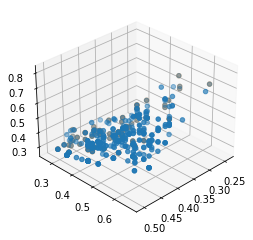

  5%|▌         | 1/20 [04:35<1:27:20, 275.79s/it]

[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 16, 19, 17, 0]
0.32308741789999995
0.5959677533999999
0.7177180109999999
0.7560132296
0.7560132296
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[19, 20, 18, 17, 0]
0.28877654030000005
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[0, 20, 6, 19, 1]
0.1322266926
0.3538427922
0.4681264756
0.5289067704
0.5289067704
[20, 0, 8, 1, 2]
0.2395905998
0.3004023856
0.38790447299999997
0.42202595719999997
0.42202595719999997
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 11, 19, 1]
0.1724427482
0.4342749034000001
0.6289906980000001
0.6897709928
0.6897709928
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 17, 3, 19, 0]
0.266

[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[5, 20, 0, 1, 19]
0.2156007183
0.4104651236
0.47124541839999995
0.5320257131999999
0.5320257131999999
[20, 18, 19, 0, 17]
0.2976780923
0.4943304509999999
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[15, 20, 0, 1, 19]
0.32852241270000004
0.5233868180000001
0.5841671128000001
0.6449474076
0.6449474076
[19, 0, 1, 2, 20]
0.24572626570000003
0.3245424534
0.42241141639999996
0.48217482879999995
0.48217482879999995
[17, 20, 9, 0, 19]
0.2904257372
0.517060007
0.6604328061
0.7021603256
0.7021603256
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 1, 18]
0.27843564

[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 11, 0, 1, 19]
0.3065268587
0.5682104031999999
0.628990698
0.6897709928
0.6897709928
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 12, 0, 1, 19]
0.2890792816
0.4984200948
0.5592003896
0.6199806844
0.6199806844
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 3, 4, 0, 19]
0.26096019319999997
0.35767124359999997
0.4657768112999999
0.5075043308
0.5075043308
[20, 19, 0, 13, 18]
0.2937265877
0.49212940039999997
0.5653496546
0.6385699087999999
0.6385699087999999
[20, 16, 0, 1, 19]
0.30384497460000004
0.5574828668
0.6182631616
0.6790434564
0

[20, 15, 7, 0, 19]
0.3184776822
0.5697002575999999
0.6958467673
0.7375742867999999
0.7375742867999999
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0, 7, 20, 1, 19]
0.1476844934
0.379787977
0.5299576788
0.5907379736
0.5907379736
[0, 14, 1, 2, 20]
0.127975327
0.35426893260000003
0.45213789560000006
0.511901308
0.511901308
[5, 20, 0, 1, 19]
0.2156007183
0.4104651236
0.47124541839999995
0.5320257131999999
0.5320257131999999
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 17, 0, 1, 19]
0.2778543274
0.45352027800000005
0.5143005728000001
0.5750808676
0.5750808676
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 14, 17]
0.3468372316
0.5983506881999999
0.7635581264999999
0.8510124844
0.8510124844
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 18]
0.278435649
0.4615475229999999

[20, 12, 0, 1, 19]
0.2890792816
0.4984200948
0.5592003896
0.6199806844
0.6199806844
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 9, 0, 19, 18]
0.3102055135
0.5432774926
0.6238815523000001
0.704485612
0.704485612
[20, 19, 6, 0, 18]
0.2861345679999999
0.47694536099999996
0.5693252898
0.6082018299999999
0.6082018299999999
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 10, 0, 1, 19]
0.3003063911
0.5433285328
0.6041088276
0.6648891224
0.6648891224
[20, 9, 1, 6, 19]
0.3171334429
0.5571333514
0.6637181158
0.7321973296
0.7321973296
[13, 20, 0, 1, 19]
0.2428498543
0.4377142596
0.49849455439999996
0.5592748491999999
0.5592748491999999
[15, 20, 0, 1, 19]
0.32852241270000004
0.5233868180000001
0.5841671128000001
0.6449474076
0.6449474076
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.51947683849

[20, 19, 5, 0, 18]
0.2869143037
0.47850483239999997
0.5724442326
0.6113207728
0.6113207728
[19, 20, 0, 1, 18]
0.26953409700000003
0.461547523
0.5194768384999999
0.577406154
0.577406154
[15, 20, 0, 1, 19]
0.32852241270000004
0.5233868180000001
0.5841671128000001
0.6449474076
0.6449474076
[18, 20, 19, 0, 17]
0.2802236024
0.494330451
0.6160807086
0.6543759272
0.6543759272
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 3, 0, 18]
0.26664770930000004
0.43797164359999996
0.491377855
0.5302543952
0.5302543952
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[16, 20, 0, 1, 19]
0.3626184615
0.5574828667999999
0.6182631615999999
0.6790434563999999
0.6790434563999999
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[10, 9, 0, 1, 20]
0.35755924780000004
0.5737746

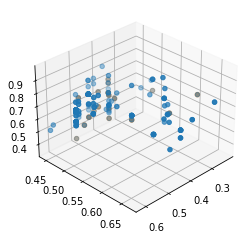

 10%|█         | 2/20 [09:11<1:22:42, 275.71s/it]

[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[9, 0, 1, 2, 20]
0.2821067469
0.36092293459999997
0.45879189759999994
0.5185553099999999
0.5185553099999999
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 8, 19]
0.13216529989999998
0.3537200068
0.46024337849999997
0.5286611995999999
0.5286611995999999
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923

[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[10, 0, 20, 19, 18]
0.36828789240000004
0.493586655

[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[17, 0, 20, 19, 1]
0.2586558727
0.364130871
0.5143005728000001
0.5750808676
0.5750808676
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 12, 19, 0, 18]
0.30890304649999994
0.5380676245999999
0.6603992038
0.6992757439999999
0.6992757439999999
[17, 0, 20, 1, 19]
0.2586558727
0.36413087099999997
0.5143005728
0.

[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 2

[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[9, 0, 20, 1, 19]
0.3087655575
0.4142405558
0.5644102576000001
0.6251905524000001
0.6251905524000001
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[16, 20, 19, 18, 17]
0.420737445
0.6737208337999999
0.8343476316
0.9115193904
0.9115193904
[4, 19, 20, 18, 0]
0.25805485959999996
0.4668086618
0.595074609
0.6339511492
0.6339511492
[0, 1, 20, 19, 2]
0.1205437072
0.279192

[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[4, 0, 20, 19, 18]
0.25805485959999996
0.38335362279999996
0.5533470895
0.6339511492
0.6339511492
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786

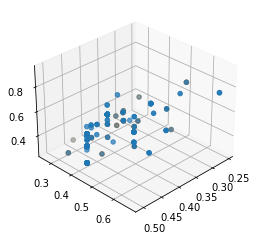

 15%|█▌        | 3/20 [13:48<1:18:19, 276.45s/it]

[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 8, 19, 18, 0]
0.2860731753
0.44674813979999994
0.569079719
0.6079562592
0.6079562592
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543

[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 18, 17, 16]
0.36196395809999

[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 16]
0.3619639580999999
0.628

[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 8, 19, 18, 0]
0.2860731753
0.44674813979999994
0.569079719
0.6079562592
0.6079562592
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 2, 19, 18, 0]
0.274451582

[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 1, 19, 18, 0]
0.278435649
0.4161980346
0.5385296138
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.51947683

[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 12, 19, 0, 1]
0.28907928159999996
0.4984200948
0.6009279090999999
0.6199806844
0.6199806844
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096

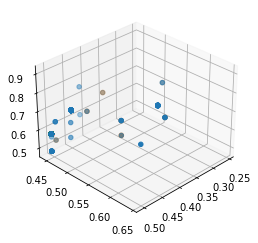

 20%|██        | 4/20 [21:28<1:33:00, 348.77s/it]

[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0

[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240

[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.34432409

[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 20, 10]
0.13956347
0.3172324906
0.4528118942
0.55825388
0.55825388
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 4]
0.0745753439
0

[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 2, 0, 1, 19]
0.2546278177
0.36061423919999996
0.42139453399999993
0.48217482879999995
0.48217482879999995
[0, 1, 2, 3, 20]
0.08608102329999999
0.

[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
current memory utilization is 6.235076MB
peak memory utilisation is 7.497054MB
c

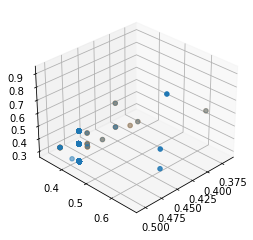

 25%|██▌       | 5/20 [30:31<1:44:42, 418.82s/it]

[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 7, 1, 2, 3]
0.08359581489999998
0.25161061999999995
0.31204971509999996
0.3343832595999999
0.3343832595999999
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649


[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.61608070

[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 15, 0, 19, 1]
0.2953209624
0.523386818
0.5841671128
0.6449474075999999
0.6449474075999999
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42

[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.482174

[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 12, 0, 19, 1]
0.28907928159999996
0.4984200948
0.5592003896
0.6199806844
0.6199806844
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.519

[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.44

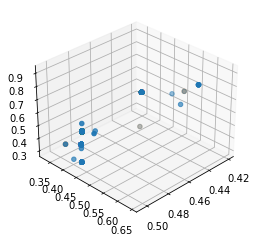

 30%|███       | 6/20 [39:40<1:48:02, 463.05s/it]

[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 1, 18]
0.278435649
0.4615475229999

[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 2, 19

[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 

[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2

[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19

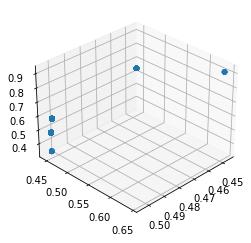

 35%|███▌      | 7/20 [46:31<1:36:41, 446.23s/it]

[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 18]
0.1443515385
0.378

[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 19

[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 1

[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.27843

[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 18, 1]
0.278435649

[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
current memory utilization is 6.393729MB
peak memory utilisation is 7.889683MB
cpu load/core is [0.0, 0.0, 0.125]


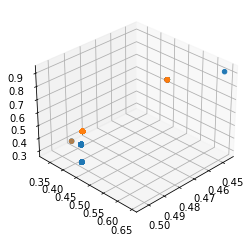

 40%|████      | 8/20 [51:24<1:19:28, 397.36s/it]

[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.416577

[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0

[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 1]
0.27843

[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 19, 18, 17]
0.2976780923
0.416577370599

[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 18]
0.278435649
0.4

[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 0, 1, 2, 3]
0.2201651338


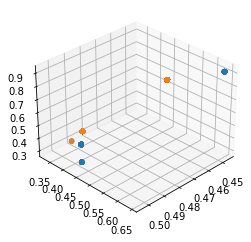

 45%|████▌     | 9/20 [56:19<1:06:57, 365.22s/it]

[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 2]
0.12054370

[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 20, 19, 18

[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 

[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48

[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 20

[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
current memory utilization is 6.421952MB
peak memory utilisation is 7.889683MB
cpu load/core is [0.0, 0.0, 0.125]


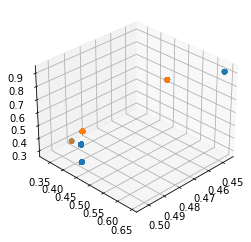

 50%|█████     | 10/20 [1:03:22<1:03:51, 383.18s/it]

[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 

[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446


[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 20, 1, 2, 3]
0.08

[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0

[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.4821

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 3]
0.0860810233
0.26155145

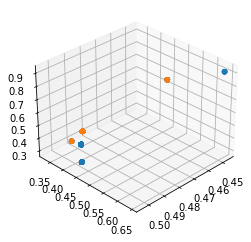

 55%|█████▌    | 11/20 [1:12:46<1:05:46, 438.49s/it]

[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759

[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.482

[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154

[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999

[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546

current memory utilization is 7.458049MB
peak memory utilisation is 7.889683MB
cpu load/core is [1.875, 0.75, 0.375]


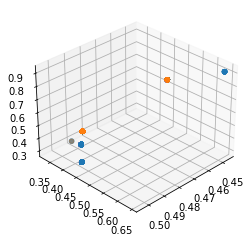

 60%|██████    | 12/20 [1:22:16<1:03:48, 478.51s/it]

[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.482174

[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 

[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.519476838

[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.57

[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.482174

[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
current memory utilization is 6.475464MB
peak memory utilisation is 8.794086MB
cpu load/core is [0.0, 0.25, 0.25]


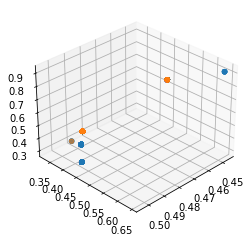

 65%|██████▌   | 13/20 [1:31:36<58:42, 503.18s/it]  

[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.144

[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.616080708

[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040

[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 

[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.14435153

[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
current memory utilization is 6.501559MB
peak memory utilisation is 8.794086MB
cpu load/core is [0.25, 0.25, 0.25]


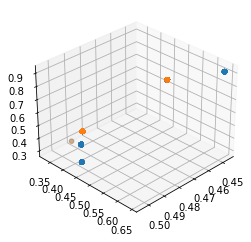

 70%|███████   | 14/20 [1:41:02<52:13, 522.23s/it]

[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.37809

[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 1]
0.1443515

[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 20, 1, 2, 3]
0.0860810

[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 1, 18]
0.14

[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 1, 2

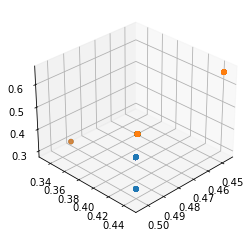

 75%|███████▌  | 15/20 [1:50:31<44:40, 536.15s/it]

[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.330476

[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 19, 0, 

[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 19, 

[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.65

[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 

[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
current memory utilization is 6.447488MB
peak memory utilisation is 8.794086MB
cpu load/core is [0.0, 0.25, 0.25]


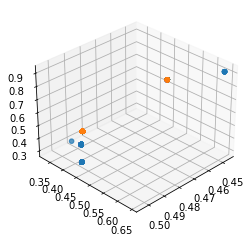

 80%|████████  | 16/20 [1:59:51<36:14, 543.53s/it]

[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759

[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.48217

[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[20, 19, 0, 1, 2

[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[0,

[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[0, 20, 1, 2, 19]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 20, 19, 1, 18]
0.1443515385
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 1, 2]
0.1205437072
0.3304768214
0.4480533446
0.4821748288
0.4821748288
[

[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
current memory utilization is 6.551225MB
peak memory utilisation is 8.794086MB
cpu load/core is [0.0, 0.125, 0.25]


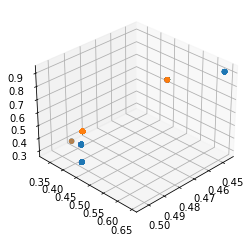

 85%|████████▌ | 17/20 [2:09:15<27:28, 549.58s/it]

[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[

[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 2, 19]
0.1205437072


[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.344324093

[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 3, 4]
0.0745753439
0.1872562384
0.25784751589999994
0.2983013755999999
0.2983013755999999
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.

[0, 1, 20, 2, 19]
0.1205437072
0.279192965
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 2, 3]
0.0860810233
0.21026759720000002
0.3219905487
0.3443240932
0.3443240932
[0, 20, 19, 18, 17]
0.1635939818
0.4165773705

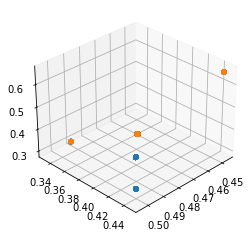

 90%|█████████ | 18/20 [2:18:38<18:27, 553.65s/it]

[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002


[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 19, 0, 1, 18]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0,

[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[0, 1, 2, 20, 3]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 19, 0, 1, 2]
0.2546278177
0.41393186039999996
0.4480533445999999
0.48217482879999995
0.48217482879999995
[20, 0, 1, 2, 3]
0.2201

[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 20, 1, 19, 18]
0.1443515385
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 19, 0, 18, 1]
0.278435649
0.461

[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 19, 18, 17, 0]
0.2976780923
0.5000324096
0.6160807086
0.6543759271999999
0.6543759271999999
[20, 0, 19, 1, 2]
0.2546278177
0.33047682139999995
0.4480533446
0.4821748288
0.4821748288
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 19, 18, 0, 1]
0.278435649
0.46154752299999996
0.5583533786999999
0.577406154
0.577406154
[20, 0, 1, 19, 2]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288

[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[0, 20, 1, 2, 3]
0.0860810233
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[0, 20, 19, 18, 1]
0.1443515385
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[0, 20, 1, 19, 2]
0.1205437072
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
current memory utilization is 6.507385MB
peak memory utilisation is 8.821375MB
cpu load/core is [0.25, 0.375, 0.25]


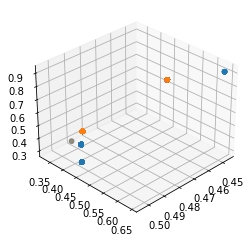

 95%|█████████▌| 19/20 [2:27:59<09:15, 555.93s/it]

[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 2]
0.1205437072
0.27919296499999996
0.4253786003999999
0.48217482879999995
0.48217482879999995
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[0, 1, 20, 19, 18]
0.1443515385

[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 18, 17, 16]
0.3619639580999999


[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 20, 19]
0.1205437072
0.279192965
0.3957526058
0.4821748288
0.4821748288
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 1]
0.278435649
0.46154752299999996
0.5194768384999999
0.577406154
0.577406154
[20, 0, 1, 2, 3]
0.2201651338
0.2615514536
0.3219905487
0.3443240932
0.3443240932
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 20,

[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 19, 18]
0.1443515385
0.3268086276
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 19, 18, 1]
0.278435649
0.37809248399999995
0.5194768384999999
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999

[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 19, 18, 0, 17]
0.2976780923
0.5000324096
0.6160807086
0.6543759272
0.6543759272
[20, 19, 18, 17, 16]
0.3619639580999999
0.6286041412
0.8089383059999999
0.9115193904
0.9115193904
[20, 0, 19, 18, 17]
0.2976780923
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[0, 20, 19, 18, 17]
0.1635939818
0.41657737059999994
0.5772041684
0.6543759271999999
0.6543759271999999
[20, 19, 0, 18, 17]
0.2976780923
0.5000324096
0.5772041684
0.6543759271999999
0.6543759271999999
[0, 1, 20, 2, 19]
0.1205437072


[20, 0, 1, 2, 19]
0.2546278177
0.3304768214
0.42537860040000003
0.4821748288
0.4821748288
[20, 0, 1, 19, 18]
0.278435649
0.378092484
0.4968020943
0.577406154
0.577406154
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
[0, 1, 2, 3, 20]
0.08608102329999999
0.21026759720000002
0.2923645541
0.3443240932
0.3443240932
[20, 0, 19, 1, 18]
0.278435649
0.378092484
0.5194768384999999
0.577406154
0.577406154
current memory utilization is 6.614988MB
peak memory utilisation is 8.821375MB
cpu load/core is [0.0, 0.0, 0.125]


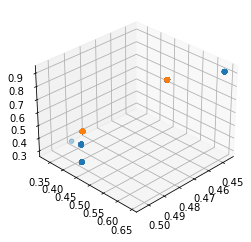

100%|██████████| 20/20 [2:37:35<00:00, 472.77s/it]


In [48]:
#MOPSO main loop
start1 = time.perf_counter()
exec_timemopso = []
avg_cpu_utilmopso = []
for it in tqdm(range(1, maxIt)):
    start1 = time.perf_counter()
    for i in range(nPop):
        leader = SelectLeader(Repos,beta)
        #print ("leader", leader)
        # update velocity
#         print ("Particles[i].best_position", Particles[i].best_position, "type", 
   #                type(Particles[i].best_position))
        #leader.position = np.array(leader)
        leaderpos_1 = leader.position
        
        #print ("Repos", Repos, "type", type(Repos))
        #print ("beta", beta, "type", type(beta))
        #print ("Particles[i].velocity", Particles[i].velocity, "type", type(Particles[i].velocity))
        
        # Particles[i].position = np.array(Particle[i].position)
        
        #print ("Particles[i].position", Particles[i].position, "type", 
            #      type(Particles[i].position))
        #print ("leader.position", leader.position, "type", 
             #     type(leader.position))
        
        positions = zip(Particles[i].best_position, Particles[i].position)
        position_diff = [x - y for (x, y) in positions]
        
        leaders = zip(leaderpos_1, Particles[i].position)
        leader_pos = [x - y for (x, y) in leaders]
        
        Particles[i].velocity = w*Particles[i].velocity  \
            + c1*np.random.rand(1,nVar)[0]*(position_diff) \
            + c2*np.random.rand(1,nVar)[0]*(leader_pos)
        
       
        # update position
        Particles[i].position = Particles[i].position + Particles[i].velocity
        

        # evaluation
        tp = dupfix(Particles[i].position)
        Particles[i].cost = MOCPParticle(tp)
        
        

        if Dominates(Particles[i].cost,Particles[i].best_cost):
            Particles[i].best_position = tp
            Particles[i].best_cost = Particles[i].cost
        else:
            if np.random.rand() > 0.5:
                Particles[i].best_position = tp
                Particles[i].best_cost = Particles[i].cost
      
    end1 = time.perf_counter()
    end_time_mopso = end1 - start1
        
    exec_timemopso.append(end_time_mopso)
    
    Repos = Repos + Particles
    Repos = DetermineDomination(Repos)
    Repos = [item for item in Repos if item.IsDominated == False ]
    fitmopso = [item.cost for item in Particles]
    fitmopso = [item.cost for item in Repos]
    ftDfmopso = pd.DataFrame(fitmopso)
    ftDfmopso = pd.DataFrame(fitmopso)
    hyp = pg.hypervolume(ftDfmopso[[0, 1, 2, 3]].values)
    hyprepo  = pg.hypervolume(ftDfmopso[[0, 1, 2, 3]].values)
    hypvol = hyp.compute([20, 20, 20, 20]) / np.prod([20, 20, 20, 20])
    hypvolrepo = hyp.compute([20, 20, 20, 20]) / np.prod([20, 20, 20, 20])
    hyper2.append(hypvol)
    #hyper2repo.append(hypvolrepo)
    
    core_amount = psutil.cpu_count()
    core_load = [x / core_amount * 100 for x in psutil.getloadavg()]
    avg_cpu_util = psutil.cpu_percent()
    avg_cpu_utilmopso.append(avg_cpu_util)
        
        
    
       
    #return Repos, core_load, avg_cpu_utilmopso, exec_timemopso


    '''time measurement'''
    tracemalloc.start()
    #start1 = time.perf_counter()
    Repos, core_load, avg_cpu_utilmopso, exec_timemopso 
    current, peak = tracemalloc.get_traced_memory()
    #end = time.perf_counter()
    #tracemalloc.stop()
    #exec_timeNSGA3 = end - start
    
    #print("time taken is {}".format(exec_timemopso) )
    #print("time taken is {}".format(exec_timemopso) )
    print(f"current memory utilization is {current/10**6}MB")
    print(f"peak memory utilisation is {peak/10**6}MB")
    print("cpu load/core is {}".format(core_load))
    #print("avg_cpu utilisation is {}".format(avg_cpu_utilmopso))
    
 
    grid = CreateGrid(Repos,NoGrid,alpha=0.1,nobj=nObj)
    for r in range(len(Repos)):
        Repos[r] = FindGridIndex(Repos[r],grid)

    # check if repository is full
    if len(Repos) > nRep :
        extra = len(Repos) - nRep
        for e in range(extra):
            Repos = deleteOneRepositoryMember(Repos,gamma)

        ########## show figure ########## 
    #plt.clf()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    particlesCost = np.reshape( [item.cost for item in Particles ],newshape=(nPop,5))
    repositoryCost = [item.cost for item in Repos]
    repositoryCost = np.reshape( repositoryCost, newshape=(len(repositoryCost),5))
    ax.scatter(particlesCost[:,0], particlesCost[:,1],  particlesCost[:,2],'o')
    ax.scatter(repositoryCost[:,0], repositoryCost[:,1], repositoryCost[:,2],'r*')
    ax.view_init(elev=30, azim=45)
    plt.grid(True)
    plt.show()
    #plt.draw()
    #plt.pause(0.00000000001)

    w=w*wdamping
    
# print(repositoryCost)
# print("ok")
# print(particlesCost)
    ########## show figure ##########
plt.show()
#print(exec_timemopso)

In [ ]:
avg_cpu_utilmopso

In [ ]:
def Average(avg_cpu_utilmopso):
    sum_of_list = 0
    for i in range(len(avg_cpu_utilmopso)):
        sum_of_list += avg_cpu_utilmopso[i]
    average = sum_of_list/len(avg_cpu_utilmopso)
    return average


avg_cpu_utilmopso = [14.4,
 16.1,
 14.5,
 15.0,
 14.5,
 14.5,
 14.5,
 14.4,
 15.8,
 17.5,
 16.9,
 14.8,
 14.5,
 15.3,
 17.6,
 17.6,
 17.4,
 17.4,
 17.4,
 17.7,
 17.4,
 17.8,
 17.7,
 17.6,
 17.8,
 17.7,
 18.2,
 17.7,
 17.5,
 17.9,
 17.5,
 17.5,
 17.5,
 17.5,
 19.5,
 17.4,
 17.6,
 17.4,
 17.6,
 17.8,
 17.5,
 17.7,
 17.6,
 17.7,
 17.0,
 14.9,
 20.2,
 17.0,
 16.7,
 15.3,
 15.6,
 15.9,
 14.7,
 14.6,
 14.4,
 17.3,
 17.6,
 17.5,
 17.6,
 17.7,
 17.7,
 17.6,
 18.0,
 17.6,
 17.9,
 17.5,
 17.7,
 17.6,
 17.0,
 15.7,
 20.1,
 16.2,
 19.0,
 20.6,
 19.3,
 20.8,
 19.3,
 16.1,
 15.9,
 18.4,
 20.2,
 20.2,
 20.1,
 20.2,
 20.3,
 20.2,
 20.2,
 20.4,
 20.2,
 20.3,
 20.3,
 22.4,
 19.4,
 24.2,
 20.1,
 17.9,
 16.7,
 16.8,
 17.7,
 18.0]
avg_cpu_utilmopso = Average(avg_cpu_utilmopso)
print("avg_cpu_utilmopso =", (avg_cpu_utilmopso))

In [ ]:
exec_timemopso = [156.89874909999997,
 279.80183550000004,
 268.3438461999999,
 272.9381439000001,
 270.0277644999999,
 271.43007579999994,
 271.4876704999999,
 271.2191800999999,
 354.9238381,
 522.5732605999997,
 408.81406259999994,
 271.83373450000045,
 270.35336709999956,
 316.0428923999998,
 528.3712073000006,
 529.3030598999994,
 515.6767126999994,
 524.8834243000001,
 524.5965821,
 533.9613890999999,
 524.8898708999996,
 531.0305977999997,
 533.2757366000005,
 527.6157942999998,
 532.0355784999992,
 531.6171736999986,
 541.650662,
 527.5432203,
 532.6413225999986,
 531.0425778999997,
 532.5661311000003,
 532.0101040000009,
 530.1573100000005,
 535.3958607000004,
 538.3255926000002,
 532.6948758000017,
 534.0339647000001,
 532.1326239000009,
 536.6026323999977,
 531.4643006000006,
 537.8050280999996,
 531.3608695999974,
 536.404950600001,
 531.6728815999995,
 442.0719921000018,
 275.22357529999863,
 315.9367463999988,
 291.49238129999867,
 291.43108819999907,
 279.01544410000133,
 276.00478550000116,
 279.63842139999906,
 271.34554500000013,
 272.0671403999986,
 272.3854852000004,
 484.1308190000018,
 531.0683411999998,
 527.4500549000004,
 528.3170156000015,
 532.9425850999978,
 532.8458722999967,
 523.5019296999999,
 532.0707575999986,
 528.8027295000029,
 536.0017783000003,
 531.7680699000011,
 532.0782137999995,
 527.9833922999969,
 374.01549629999863,
 279.4089978000011,
 308.6179857999996,
 283.21005270000023,
 301.27311089999785,
 355.8657273999961,
 338.82779749999463,
 359.14884470000106,
 333.4212120000011,
 304.74148910000076,
 301.6969262999992,
 418.00406049999583,
 577.3835147999998,
 574.4800200000027,
 575.690900499998,
 573.9238689999984,
 580.3132805999994,
 580.7531325999953,
 575.4586101000023,
 582.6118447999979,
 579.0481622000007,
 581.5640362999984,
 583.4538751,
 449.95387749999645,
 348.7780514000042,
 375.06589719999465,
 353.6275072999997,
 321.6976746,
 309.9142838999978,
 309.37602920000063,
 320.8631491999986,
 327.57528929999535]
exec_timemopso = Average(exec_timemopso)
print("exec_timemopso =", (exec_timemopso))

In [ ]:
sum(exec_timemopso)

In [ ]:
exec_timemopso

In [ ]:
core_load

In [ ]:
 dir(Particles[0])

In [ ]:
Temp_Particles
indsDf1 = pd.DataFrame(Temp_Particles)
indsDf1

In [ ]:

inds = [item.best_position for item in Particles]
indsDf = pd.DataFrame(inds)
indsDf.sample(2)
indsDf

In [ ]:
mopsopop2 = pd.DataFrame(indsDf1)
mopsopop2.to_csv("mopsoinitial2_data.csv", index=False)

In [ ]:
mopsopop2 = pd.DataFrame(indsDf)
mopsopop2.to_csv("mopsofinal2_data.csv", index=False)

In [ ]:
print("avg_cpu utilisation is {}".format(avg_cpu_utilmopso))

In [ ]:
sum(core_load)

In [ ]:
sum(avg_cpu_utilmopso)

In [ ]:
mopsopop2 = pd.DataFrame(indsDf1)
col_name = ['output_'+ str(col) for col in range (5)]
mopsopop2[col_name] = indsDf
mopsopop2['exec_timemopso'] = sum(exec_timemopso)
mopsopop2['avg_cpu_utilmopso'] = sum(avg_cpu_utilmopso)
mopsopop2['core_load'] = sum(core_load)
mopsopop2.to_csv("mopsooptimised2_data.csv", index=False)